# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

import time
import json
#import openweathermapy as ow

from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



In [ ]:
## Generate Cities List

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
#lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
#lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lats = np.random.uniform(low=-90.000, high=90.000, size=200)
lngs = np.random.uniform(low=-180.000, high=180.000, size=200)


lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


In [22]:
#List for holding lat_lngs and cities
lat_lngs = [] 
cities = []

#Create a set of random lat and lng combinations
#lats = np.random.uniform(low=-90.000, high=90.000, size=1500)

#lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lats = np.random.uniform(low=-90.000, high=90.000, size=1500) 
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)

#Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs: 
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
# If the city is unique, then add it to a our cities list

        cities.append(city)
    
#Print the city count to confirm sufficient count
len(cities)

614

In [23]:
cities


['thompson',
 'oskarshamn',
 'puerto escondido',
 'karabash',
 'lima',
 'kapaa',
 'illoqqortoormiut',
 'rikitea',
 'bredasdorp',
 'longyearbyen',
 'porbandar',
 'tuktoyaktuk',
 'batsfjord',
 'ushuaia',
 'mataura',
 'barentsburg',
 'busselton',
 'brewster',
 'ituni',
 'barrow',
 'ballina',
 'nurlat',
 'bronnoysund',
 'new norfolk',
 'hay river',
 'disna',
 'bluff',
 'tasiilaq',
 'port alfred',
 'jamestown',
 'rio grande',
 'ojinaga',
 'albany',
 'gardan diwal',
 'luwuk',
 'vaini',
 'tazovskiy',
 'salinopolis',
 'mackay',
 'torbay',
 'narsaq',
 'armidale',
 'fujin',
 'taolanaro',
 'san vicente',
 'puerto ayora',
 'pombia',
 'san patricio',
 'hamada',
 'arraial do cabo',
 'vestmanna',
 'hobart',
 'nishihara',
 'santa lucia',
 'mar del plata',
 'cabo san lucas',
 'chuy',
 'beringovskiy',
 'khatanga',
 'butaritari',
 'kahului',
 'saint george',
 'vardo',
 'laguna',
 'guerrero negro',
 'paamiut',
 'bethel',
 'iqaluit',
 'hirara',
 'cherskiy',
 'tumannyy',
 'juybar',
 'ahipara',
 'atuona',
 '

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [24]:
units = "imperial"

url = "http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q="



city = "albany"

#city = input("City Name: ")

query_url = url + city

print (query_url)

json_data = requests.get(query_url).json()

pprint(json_data)

cloud = json_data ["clouds"]["all"]
print (cloud)
lat = json_data ["coord"]["lat"]
print (lat)

http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=albany
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 42.65, 'lon': -73.75},
 'dt': 1554764657,
 'id': 5106834,
 'main': {'humidity': 71,
          'pressure': 1006,
          'temp': 286.34,
          'temp_max': 289.26,
          'temp_min': 282.04},
 'name': 'Albany',
 'sys': {'country': 'US',
         'id': 3273,
         'message': 0.0221,
         'sunrise': 1554719128,
         'sunset': 1554766075,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 170, 'speed': 2.1}}
90
42.65


In [25]:
lat_list = []
lng_list = []
Temp_list = []
Humidity_list =[]
City_list = []
Cloud_list= []
Wind_list = []
Date_list = []
Country_list = []

for city in cities:
    print ("Accessing data request" + " " + city) 
    try:
        query_url = url + city
        print (query_url)
        json_data = requests.get(query_url).json()
        pprint (json_data)
        lat = json_data ["coord"]["lat"]
        lat_list.append (lat)
        print (lat_list)
        lon = json_data ["coord"]["lon"]
        lng_list.append (lon)
        print (lng_list)
        Temp_list.append(json_data ["main"]["temp_max"])
        print (Temp_list)
        Humidity_list.append(json_data["main"]["humidity"])
        print (Humidity_list)
        City_list.append(json_data["name"])
        print (City_list)
        Cloud_list.append(json_data ["clouds"]["all"])
        print (Cloud_list)
        Wind_list.append(json_data ["wind"]["speed"])
        Country_list.append (json_data ["sys"]["country"])
        Date_list.append(json_data ["dt"])
        
    
    except:
        print("Skip City" + city)
        
        
print (lat_list)
print (lng_list)
print (Temp_list) 
print(Humidity_list)
print (City_list)
print (Cloud_list)
print (Wind_list)
        
#pprint (json_data)        
    
    
    

Accessing data request thompson
http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=thompson
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 55.74, 'lon': -97.86},
 'dt': 1554760800,
 'id': 6165406,
 'main': {'humidity': 67,
          'pressure': 1019,
          'temp': 267.15,
          'temp_max': 267.15,
          'temp_min': 267.15},
 'name': 'Thompson',
 'sys': {'country': 'CA',
         'id': 935,
         'message': 0.0056,
         'sunrise': 1554723857,
         'sunset': 1554772916,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'light snow',
              'icon': '13d',
              'id': 600,
              'main': 'Snow'}],
 'wind': {'deg': 50, 'speed': 5.1}}
[55.74]
[-97.86]
[267.15]
[67]
['Thompson']
[90]
Accessing data request oskarshamn
http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=oskarshamn
{'base': 'stat

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 78.22, 'lon': 15.63},
 'dt': 1554760200,
 'id': 2729907,
 'main': {'humidity': 78,
          'pressure': 1032,
          'temp': 263.15,
          'temp_max': 263.15,
          'temp_min': 263.15},
 'name': 'Longyearbyen',
 'sys': {'country': 'NO',
         'id': 1663,
         'message': 0.0049,
         'sunrise': 1554775292,
         'sunset': 1554839783,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'light snow',
              'icon': '13n',
              'id': 600,
              'main': 'Snow'}],
 'wind': {'speed': 1}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22]
[-97.86, 16.44, -97.07, 60.21, -77.04, -159.32, -134.97, 20.04, 15.63]
[267.15, 276.15, 302.15, 271.36, 296.15, 300.15, 297.81, 293.15, 263.15]
[67, 74, 70, 78, 78, 65, 100, 88, 78]
['Thompson', 'Oskarshamn', 'Puerto Escondido', 'Karabash', 'Lima', 'Kapaa', 'Rikitea', 'Bredasdorp', 'Longyearbyen']
[9

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -38.31, 'lon': -60.23},
 'dt': 1554764732,
 'id': 3833859,
 'main': {'grnd_level': 1003.91,
          'humidity': 42,
          'pressure': 1015.58,
          'sea_level': 1015.58,
          'temp': 294.86,
          'temp_max': 294.86,
          'temp_min': 294.86},
 'name': 'Barrow',
 'sys': {'country': 'AR',
         'message': 0.0037,
         'sunrise': 1554718867,
         'sunset': 1554759847},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 0.000457764, 'speed': 4.99}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31]
[-97.86, 16.44, -97.07, 60.21, -77.04, -159.32, -134.97, 20.04, 15.63, 69.61, -133.03, 29.72, -68.31, 168.86, 115.35, -70.08, -60.23]
[267.15, 276.15, 302.15, 271.36, 296.15, 300.15, 297.81, 293.15, 263.15, 297.31, 258

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 65.61, 'lon': -37.64},
 'dt': 1554760200,
 'id': 3424607,
 'main': {'humidity': 43,
          'pressure': 1029,
          'temp': 274.15,
          'temp_max': 274.15,
          'temp_min': 274.15},
 'name': 'Tasiilaq',
 'sys': {'country': 'GL',
         'id': 81,
         'message': 0.0055,
         'sunrise': 1554707980,
         'sunset': 1554759893,
         'type': 1},
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 70, 'gust': 15.9, 'speed': 10.3}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61]
[-97.86, 16.44, -97.07, 60.21, -77.04, -159.32, -134.97, 20.04, 15.63, 69.61, -133.03, 29.72, -68.31, 168.86, 115.35, -70.08, -60.23, -9.15, 50.8, 12.2, 147.06, -115.79, 149.07, -37.

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 42.65, 'lon': -73.75},
 'dt': 1554764603,
 'id': 5106834,
 'main': {'humidity': 71,
          'pressure': 1006,
          'temp': 286.36,
          'temp_max': 289.26,
          'temp_min': 282.04},
 'name': 'Albany',
 'sys': {'country': 'US',
         'id': 3273,
         'message': 0.0056,
         'sunrise': 1554719128,
         'sunset': 1554766075,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 170, 'speed': 2.1}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65]
[-97.86, 16.44, -97.07, 60.21, -77.04, -159.32, -134.97, 20.04, 15.63, 69.61, -133.03, 29.72, -68.31, 168.86, 115.35, -70.08, -60.23, -9

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': -0.61, 'lon': -47.36},
 'dt': 1554764861,
 'id': 3389822,
 'main': {'grnd_level': 1013.03,
          'humidity': 100,
          'pressure': 1013.14,
          'sea_level': 1013.14,
          'temp': 299.91,
          'temp_max': 299.91,
          'temp_min': 299.91},
 'name': 'Salinopolis',
 'sys': {'country': 'BR',
         'message': 0.0031,
         'sunrise': 1554714486,
         'sunset': 1554758051},
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 32.5005, 'speed': 4.14}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61]
[-97.86, 16.44, -97.07, 60.21, -77.04, -159.32, -134.97, 20.04, 15.63, 69.61, -133.03, 29.72

{'base': 'stations',
 'clouds': {'all': 12},
 'cod': 200,
 'coord': {'lat': -30.51, 'lon': 151.67},
 'dt': 1554764415,
 'id': 2177671,
 'main': {'humidity': 46,
          'pressure': 1017,
          'temp': 293.15,
          'temp_max': 293.15,
          'temp_min': 293.15},
 'name': 'Armidale',
 'sys': {'country': 'AU',
         'id': 2007453,
         'message': 0.0034,
         'sunrise': 1554754102,
         'sunset': 1554795687,
         'type': 3},
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 327, 'gust': 6.71, 'speed': 2.68}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51]
[-97.86, 16.44, -97.07, 60.21, -77.04, -159.32, -134.97, 20.04, 15.63, 69.61, -133.03

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 45.65, 'lon': 8.63},
 'dt': 1554764862,
 'id': 3170346,
 'main': {'humidity': 76,
          'pressure': 1008,
          'temp': 284.21,
          'temp_max': 286.15,
          'temp_min': 283.15},
 'name': 'Pombia',
 'sys': {'country': 'IT',
         'id': 6734,
         'message': 0.0062,
         'sunrise': 1554785478,
         'sunset': 1554832956,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'speed': 1}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65]
[-97.86, 16.44, -97.07, 60.21, -77.04, -159.32, -134.97, 20.04, 15.63, 69.6

 'id': 2610343,
 'main': {'humidity': 65,
          'pressure': 1028,
          'temp': 278.15,
          'temp_max': 278.15,
          'temp_min': 278.15},
 'name': 'Vestmanna',
 'sys': {'country': 'FO',
         'id': 1596,
         'message': 0.008,
         'sunrise': 1554787507,
         'sunset': 1554838509,
         'type': 1},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 90, 'speed': 5.7}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16]
[-97.86, 16.44, -97.07, 60.21, -77.04, -159.32, -134.97, 20.04, 15.63, 69.61, -133.03, 29.72, -68.31, 168.86, 115.35, -70.08, -60.23, -9.15, 50.8, 12.2, 147.06, -1

{'base': 'stations',
 'clouds': {'all': 5},
 'cod': 200,
 'coord': {'lat': 39.93, 'lon': 9.66},
 'dt': 1554760500,
 'id': 2522890,
 'main': {'humidity': 50,
          'pressure': 1011,
          'temp': 285.15,
          'temp_max': 285.15,
          'temp_min': 285.15},
 'name': 'Santa Lucia',
 'sys': {'country': 'IT',
         'id': 6733,
         'message': 0.0045,
         'sunrise': 1554785595,
         'sunset': 1554832344,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '02n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 60, 'speed': 2.1}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93]
[-97.8

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -33.69, 'lon': -53.46},
 'dt': 1554764868,
 'id': 3443061,
 'main': {'grnd_level': 1018.55,
          'humidity': 91,
          'pressure': 1019.98,
          'sea_level': 1019.98,
          'temp': 288.66,
          'temp_max': 288.66,
          'temp_min': 288.66},
 'name': 'Chuy',
 'sys': {'country': 'UY',
         'message': 0.0029,
         'sunrise': 1554717042,
         'sunset': 1554758423},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 124.5, 'speed': 2.61}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 20.89, 'lon': -156.47},
 'dt': 1554764542,
 'id': 5847411,
 'main': {'humidity': 61,
          'pressure': 1020,
          'temp': 298.7,
          'temp_max': 300.37,
          'temp_min': 297.04},
 'name': 'Kahului',
 'sys': {'country': 'US',
         'id': 7851,
         'message': 0.0039,
         'sunrise': 1554739966,
         'sunset': 1554784934,
         'type': 1},
 'visibility': 24140,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'speed': 2.1}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.43, 22.89, -

{'base': 'stations',
 'clouds': {'all': 5},
 'cod': 200,
 'coord': {'lat': 27.52, 'lon': -110.01},
 'dt': 1554759600,
 'id': 4013704,
 'main': {'humidity': 20,
          'pressure': 1011,
          'temp': 308.15,
          'temp_max': 308.15,
          'temp_min': 308.15},
 'name': 'Laguna',
 'sys': {'country': 'MX',
         'id': 7104,
         'message': 0.0036,
         'sunrise': 1554728567,
         'sunset': 1554774036,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '02d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 260, 'speed': 4.1}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.43,

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 24.8, 'lon': 125.28},
 'dt': 1554760800,
 'id': 1862505,
 'main': {'humidity': 88,
          'pressure': 1013,
          'temp': 298.15,
          'temp_max': 298.15,
          'temp_min': 298.15},
 'name': 'Hirara',
 'sys': {'country': 'JP',
         'id': 8143,
         'message': 0.0044,
         'sunrise': 1554758585,
         'sunset': 1554803867,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 160, 'speed': 3.6}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46

{'base': 'stations',
 'clouds': {'all': 36},
 'cod': 200,
 'coord': {'lat': -9.8, 'lon': -139.03},
 'dt': 1554764773,
 'id': 4020109,
 'main': {'grnd_level': 1009.75,
          'humidity': 100,
          'pressure': 1009.86,
          'sea_level': 1009.86,
          'temp': 300.71,
          'temp_max': 300.71,
          'temp_min': 300.71},
 'name': 'Atuona',
 'sys': {'country': 'PF',
         'message': 0.0037,
         'sunrise': 1554736763,
         'sunset': 1554779767},
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 98.0005, 'speed': 3.49}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35

{'cod': '404', 'message': 'city not found'}
Skip Citybelushya guba
Accessing data request jinchang
http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=jinchang
{'base': 'stations',
 'clouds': {'all': 56},
 'cod': 200,
 'coord': {'lat': 38.52, 'lon': 102.19},
 'dt': 1554764871,
 'id': 1805733,
 'main': {'grnd_level': 798.31,
          'humidity': 89,
          'pressure': 1020.9,
          'sea_level': 1020.9,
          'temp': 273.86,
          'temp_max': 273.86,
          'temp_min': 273.86},
 'name': 'Jinchang',
 'sys': {'country': 'CN',
         'message': 0.0061,
         'sunrise': 1554763491,
         'sunset': 1554810043},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 251.5, 'speed': 1.71}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 

{'base': 'stations',
 'clouds': {'all': 80},
 'cod': 200,
 'coord': {'lat': -6.12, 'lon': 141.3},
 'dt': 1554764871,
 'id': 2093846,
 'main': {'grnd_level': 999.43,
          'humidity': 82,
          'pressure': 1011.14,
          'sea_level': 1011.14,
          'temp': 300.56,
          'temp_max': 300.56,
          'temp_min': 300.56},
 'name': 'Kiunga',
 'sys': {'country': 'PG',
         'message': 0.0034,
         'sunrise': 1554755770,
         'sunset': 1554798995},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 62.5005, 'speed': 1.11}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 3

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 51.65, 'lon': 117.56},
 'dt': 1554764872,
 'id': 2016757,
 'main': {'grnd_level': 922.55,
          'humidity': 43,
          'pressure': 1023.62,
          'sea_level': 1023.62,
          'temp': 272.41,
          'temp_max': 272.41,
          'temp_min': 272.41},
 'name': 'Shelopugino',
 'sys': {'country': 'RU',
         'message': 0.0044,
         'sunrise': 1554758898,
         'sunset': 1554807260},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 266, 'speed': 2.49}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 65.28, 'lon': -126.83},
 'dt': 1554760800,
 'id': 6089245,
 'main': {'humidity': 64,
          'pressure': 1005,
          'temp': 276.15,
          'temp_max': 276.15,
          'temp_min': 276.15},
 'name': 'Norman Wells',
 'sys': {'country': 'CA',
         'id': 951,
         'message': 0.0042,
         'sunrise': 1554729396,
         'sunset': 1554781279,
         'type': 1},
 'visibility': 48279,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 130, 'speed': 4.6}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -3.36, 'lon': 135.5},
 'dt': 1554764872,
 'id': 1634614,
 'main': {'grnd_level': 936.55,
          'humidity': 86,
          'pressure': 1010.7,
          'sea_level': 1010.7,
          'temp': 298.36,
          'temp_max': 298.36,
          'temp_min': 298.36},
 'name': 'Nabire',
 'sys': {'country': 'ID',
         'message': 0.0029,
         'sunrise': 1554757077,
         'sunset': 1554800471},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 292, 'speed': 0.69}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.43

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 69.22, 'lon': -51.1},
 'dt': 1554760200,
 'id': 3423146,
 'main': {'humidity': 48,
          'pressure': 1017,
          'temp': 277.15,
          'temp_max': 277.15,
          'temp_min': 277.15},
 'name': 'Ilulissat',
 'sys': {'country': 'GL',
         'id': 165,
         'message': 0.0054,
         'sunrise': 1554710328,
         'sunset': 1554764005,
         'type': 1},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 100, 'speed': 7.7}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.43, 22.89, -33.69, 63.05,

{'base': 'stations',
 'clouds': {'all': 80},
 'cod': 200,
 'coord': {'lat': -2.57, 'lon': 150.8},
 'dt': 1554764754,
 'id': 2094342,
 'main': {'grnd_level': 1011.11,
          'humidity': 100,
          'pressure': 1012.38,
          'sea_level': 1012.38,
          'temp': 299.86,
          'temp_max': 299.86,
          'temp_min': 299.86},
 'name': 'Kavieng',
 'sys': {'country': 'PG',
         'message': 0.0044,
         'sunrise': 1554753381,
         'sunset': 1554796825},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 232.5, 'speed': 2.56}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 

{'cod': '404', 'message': 'city not found'}
Skip Citybairiki
Accessing data request dikson
http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=dikson
{'base': 'stations',
 'clouds': {'all': 56},
 'cod': 200,
 'coord': {'lat': 73.51, 'lon': 80.55},
 'dt': 1554764748,
 'id': 1507390,
 'main': {'grnd_level': 1007.75,
          'humidity': 100,
          'pressure': 1008.3,
          'sea_level': 1008.3,
          'temp': 262.71,
          'temp_max': 262.71,
          'temp_min': 262.71},
 'name': 'Dikson',
 'sys': {'country': 'RU',
         'message': 0.009,
         'sunrise': 1554763325,
         'sunset': 1554820594},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 286.5, 'speed': 2.96}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 34.52, 'lon': 50},
 'dt': 1554764873,
 'id': 113636,
 'main': {'grnd_level': 811.75,
          'humidity': 83,
          'pressure': 1012.02,
          'sea_level': 1012.02,
          'temp': 277.41,
          'temp_max': 277.41,
          'temp_min': 277.41},
 'name': 'Ashtian',
 'sys': {'country': 'IR',
         'message': 0.0036,
         'sunrise': 1554776212,
         'sunset': 1554822369},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 247.5, 'speed': 1.84}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.4

{'base': 'stations',
 'clouds': {'all': 68},
 'cod': 200,
 'coord': {'lat': -16.48, 'lon': -151.75},
 'dt': 1554764774,
 'id': 4034551,
 'main': {'grnd_level': 1012.15,
          'humidity': 100,
          'pressure': 1012.26,
          'sea_level': 1012.26,
          'temp': 301.81,
          'temp_max': 301.81,
          'temp_min': 301.81},
 'name': 'Faanui',
 'sys': {'country': 'PF',
         'message': 0.0036,
         'sunrise': 1554740026,
         'sunset': 1554782609},
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 119.5, 'speed': 6.79}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 48.95, 'lon': 4.24},
 'dt': 1554764825,
 'id': 2995603,
 'main': {'humidity': 93,
          'pressure': 1011,
          'temp': 282.17,
          'temp_max': 283.15,
          'temp_min': 280.93},
 'name': 'Saint-Pierre',
 'sys': {'country': 'FR',
         'id': 6535,
         'message': 0.0033,
         'sunrise': 1554786283,
         'sunset': 1554834258,
         'type': 1},
 'visibility': 7000,
 'weather': [{'description': 'mist', 'icon': '50n', 'id': 701, 'main': 'Mist'}],
 'wind': {'speed': 0.5}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.43, 22.89, -33.69, 63.05, 71.98, 3.07, 20.89, 39.45, 39.62, 

{'cod': '404', 'message': 'city not found'}
Skip Citysahrak
Accessing data request grand gaube
http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=grand gaube
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': -20.01, 'lon': 57.66},
 'dt': 1554764638,
 'id': 934479,
 'main': {'humidity': 83,
          'pressure': 1013,
          'temp': 297.92,
          'temp_max': 298.15,
          'temp_min': 297.59},
 'name': 'Grand Gaube',
 'sys': {'country': 'MU',
         'id': 2061,
         'message': 0.0037,
         'sunrise': 1554776290,
         'sunset': 1554818614,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 110, 'speed': 4.6}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 5

{'base': 'stations',
 'clouds': {'all': 24},
 'cod': 200,
 'coord': {'lat': -30.17, 'lon': -50.22},
 'dt': 1554764756,
 'id': 3466165,
 'main': {'grnd_level': 1009.67,
          'humidity': 86,
          'pressure': 1019.62,
          'sea_level': 1019.62,
          'temp': 290.81,
          'temp_max': 290.81,
          'temp_min': 290.81},
 'name': 'Cidreira',
 'sys': {'country': 'BR',
         'message': 0.0031,
         'sunrise': 1554716126,
         'sunset': 1554757784},
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 134, 'speed': 2.84}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.

{'base': 'stations',
 'clouds': {'all': 44},
 'cod': 200,
 'coord': {'lat': 60.75, 'lon': -137.51},
 'dt': 1554764690,
 'id': 5969025,
 'main': {'grnd_level': 877.67,
          'humidity': 50,
          'pressure': 1003.62,
          'sea_level': 1003.62,
          'temp': 276.16,
          'temp_max': 276.16,
          'temp_min': 276.16},
 'name': 'Haines Junction',
 'sys': {'country': 'CA',
         'message': 0.0042,
         'sunrise': 1554732730,
         'sunset': 1554783072},
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 185, 'speed': 2.59}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88

{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': -34.42, 'lon': 19.24},
 'dt': 1554764438,
 'id': 3366880,
 'main': {'humidity': 93,
          'pressure': 1013,
          'temp': 290.87,
          'temp_max': 291.48,
          'temp_min': 290.37},
 'name': 'Hermanus',
 'rain': {'3h': 0.245},
 'sys': {'country': 'ZA',
         'id': 2006131,
         'message': 0.0034,
         'sunrise': 1554786061,
         'sunset': 1554827281,
         'type': 3},
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 105, 'speed': 1.29}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93,

{'cod': '404', 'message': 'city not found'}
Skip Citychagda
Accessing data request alekseyevskoye
http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=alekseyevskoye
{'base': 'stations',
 'clouds': {'all': 48},
 'cod': 200,
 'coord': {'lat': 45.2, 'lon': 43.58},
 'dt': 1554764877,
 'id': 576172,
 'main': {'grnd_level': 988.87,
          'humidity': 97,
          'pressure': 1012.62,
          'sea_level': 1012.62,
          'temp': 280.51,
          'temp_max': 280.51,
          'temp_min': 280.51},
 'name': 'Alekseyevskoye',
 'sys': {'country': 'RU',
         'message': 0.0039,
         'sunrise': 1554777132,
         'sunset': 1554824529},
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 105.5, 'speed': 3.19}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -3

{'base': 'stations',
 'clouds': {'all': 80},
 'cod': 200,
 'coord': {'lat': 71.64, 'lon': 128.87},
 'dt': 1554764780,
 'id': 2015306,
 'main': {'grnd_level': 981.99,
          'humidity': 81,
          'pressure': 999.18,
          'sea_level': 999.18,
          'temp': 270.61,
          'temp_max': 270.61,
          'temp_min': 270.61},
 'name': 'Tiksi',
 'sys': {'country': 'RU',
         'message': 0.0046,
         'sunrise': 1554752585,
         'sunset': 1554808145},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 152, 'speed': 2.46}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, 

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': -0.41, 'lon': -65.02},
 'dt': 1554764878,
 'id': 3662489,
 'main': {'grnd_level': 1007.11,
          'humidity': 100,
          'pressure': 1012.74,
          'sea_level': 1012.74,
          'temp': 296.51,
          'temp_max': 296.51,
          'temp_min': 296.51},
 'name': 'Santa Isabel do Rio Negro',
 'rain': {'3h': 7.505},
 'sys': {'country': 'BR',
         'message': 0.0034,
         'sunrise': 1554718718,
         'sunset': 1554762295},
 'weather': [{'description': 'moderate rain',
              'icon': '10n',
              'id': 501,
              'main': 'Rain'}],
 'wind': {'deg': 276.5, 'speed': 0.99}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 39, 'lon': -77.4},
 'dt': 1554764859,
 'id': 4787534,
 'main': {'humidity': 88,
          'pressure': 1009,
          'temp': 293.24,
          'temp_max': 296.15,
          'temp_min': 290.93},
 'name': 'Sterling',
 'rain': {'1h': 0.45},
 'sys': {'country': 'US',
         'id': 4481,
         'message': 0.0088,
         'sunrise': 1554720212,
         'sunset': 1554766742,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 220, 'speed': 2.1}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 40.75, 'lon': 48.39},
 'dt': 1554760800,
 'id': 587033,
 'main': {'humidity': 87,
          'pressure': 1012,
          'temp': 284.15,
          'temp_max': 284.15,
          'temp_min': 284.15},
 'name': 'Basqal',
 'sys': {'country': 'AZ',
         'id': 8844,
         'message': 0.0038,
         'sunrise': 1554776262,
         'sunset': 1554823090,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 160, 'speed': 2.1}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 70.47, 'lon': -68.59},
 'dt': 1554760800,
 'id': 5924351,
 'main': {'humidity': 92,
          'pressure': 1024,
          'temp': 258.15,
          'temp_max': 258.15,
          'temp_min': 258.15},
 'name': 'Clyde River',
 'sys': {'country': 'CA',
         'id': 776,
         'message': 0.005,
         'sunrise': 1554714129,
         'sunset': 1554768597,
         'type': 1},
 'visibility': 40233,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 260, 'speed': 1}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 4.14, 'lon': 96.13},
 'dt': 1554764740,
 'id': 1214488,
 'main': {'grnd_level': 1007.67,
          'humidity': 100,
          'pressure': 1009.9,
          'sea_level': 1009.9,
          'temp': 299.96,
          'temp_max': 299.96,
          'temp_min': 299.96},
 'name': 'Meulaboh',
 'sys': {'country': 'ID',
         'message': 0.0037,
         'sunrise': 1554766291,
         'sunset': 1554810151},
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 22.0005, 'speed': 1.69}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 0.53, 'lon': 72.93},
 'dt': 1554764883,
 'id': 1337610,
 'main': {'grnd_level': 1009.27,
          'humidity': 100,
          'pressure': 1009.26,
          'sea_level': 1009.26,
          'temp': 302.16,
          'temp_max': 302.16,
          'temp_min': 302.16},
 'name': 'Thinadhoo',
 'sys': {'country': 'MV',
         'message': 0.0085,
         'sunrise': 1554771971,
         'sunset': 1554815605},
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 215.5, 'speed': 1.61}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.7

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 10.57, 'lon': 72.64},
 'dt': 1554764773,
 'id': 1267390,
 'main': {'grnd_level': 1009.11,
          'humidity': 100,
          'pressure': 1009.18,
          'sea_level': 1009.18,
          'temp': 302.36,
          'temp_max': 302.36,
          'temp_min': 302.36},
 'name': 'Kavaratti',
 'sys': {'country': 'IN',
         'message': 0.0032,
         'sunrise': 1554771720,
         'sunset': 1554815995},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 351.5, 'speed': 2.26}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.9

{'cod': '404', 'message': 'city not found'}
Skip Citysentyabrskiy
Accessing data request mount gambier
http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=mount gambier
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': -37.83, 'lon': 140.78},
 'dt': 1554760800,
 'id': 2156643,
 'main': {'humidity': 81,
          'pressure': 1020,
          'temp': 282.15,
          'temp_max': 282.15,
          'temp_min': 282.15},
 'name': 'Mount Gambier',
 'sys': {'country': 'AU',
         'id': 9560,
         'message': 0.0031,
         'sunrise': 1554757027,
         'sunset': 1554797987,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 220, 'speed': 3.1}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -3

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 48.14, 'lon': -78.13},
 'dt': 1554762780,
 'id': 6064704,
 'main': {'humidity': 100,
          'pressure': 1008,
          'temp': 270.74,
          'temp_max': 271.15,
          'temp_min': 270.15},
 'name': 'Malartic',
 'sys': {'country': 'CA',
         'id': 950,
         'message': 0.0039,
         'sunrise': 1554719808,
         'sunset': 1554767496,
         'type': 1},
 'visibility': 4828,
 'weather': [{'description': 'light snow',
              'icon': '13d',
              'id': 600,
              'main': 'Snow'}],
 'wind': {'deg': 80, 'speed': 3.1}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.43,

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 25.74, 'lon': 71.4},
 'dt': 1554764885,
 'id': 1276901,
 'main': {'grnd_level': 983.51,
          'humidity': 37,
          'pressure': 1005.74,
          'sea_level': 1005.74,
          'temp': 298.36,
          'temp_max': 298.36,
          'temp_min': 298.36},
 'name': 'Barmer',
 'sys': {'country': 'IN',
         'message': 0.0032,
         'sunrise': 1554771470,
         'sunset': 1554816840},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 282.5, 'speed': 3.99}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46

{'base': 'stations',
 'clouds': {'all': 32},
 'cod': 200,
 'coord': {'lat': 47.22, 'lon': 21.55},
 'dt': 1554763500,
 'id': 722324,
 'main': {'humidity': 67,
          'pressure': 1004,
          'temp': 285.81,
          'temp_max': 288.15,
          'temp_min': 283.15},
 'name': 'Berettyoujfalu',
 'sys': {'country': 'HU',
         'id': 6665,
         'message': 0.003,
         'sunrise': 1554782268,
         'sunset': 1554829966,
         'type': 1},
 'visibility': 9000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 10, 'speed': 2.1}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.

{'base': 'stations',
 'clouds': {'all': 24},
 'cod': 200,
 'coord': {'lat': 27.34, 'lon': 117.49},
 'dt': 1554764885,
 'id': 1795857,
 'main': {'grnd_level': 941.03,
          'humidity': 77,
          'pressure': 1009.02,
          'sea_level': 1009.02,
          'temp': 295.16,
          'temp_max': 295.16,
          'temp_min': 295.16},
 'name': 'Shaowu',
 'sys': {'country': 'CN',
         'message': 0.0043,
         'sunrise': 1554760351,
         'sunset': 1554805840},
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 201, 'speed': 1.89}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, 

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 68.22, 'lon': -135.01},
 'dt': 1554760800,
 'id': 5882953,
 'main': {'humidity': 60,
          'pressure': 1011,
          'temp': 259.55,
          'temp_max': 260.15,
          'temp_min': 259.15},
 'name': 'Aklavik',
 'sys': {'country': 'CA',
         'id': 821,
         'message': 0.0052,
         'sunrise': 1554730677,
         'sunset': 1554783924,
         'type': 1},
 'visibility': 24140,
 'weather': [{'description': 'light snow',
              'icon': '13d',
              'id': 600,
              'main': 'Snow'}],
 'wind': {'deg': 320, 'gust': 8.2, 'speed': 5.7}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 

{'cod': '404', 'message': 'city not found'}
Skip Citynizhneyansk
Accessing data request vysokaya gora
http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=vysokaya gora
{'cod': '404', 'message': 'city not found'}
Skip Cityvysokaya gora
Accessing data request grindavik
http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=grindavik
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 63.84, 'lon': -22.43},
 'dt': 1554763917,
 'id': 3416888,
 'main': {'humidity': 75,
          'pressure': 1028,
          'temp': 278.35,
          'temp_max': 278.71,
          'temp_min': 278.15},
 'name': 'Grindavik',
 'sys': {'country': 'IS',
         'id': 90,
         'message': 0.0043,
         'sunrise': 1554704677,
         'sunset': 1554755897,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
           

{'base': 'stations',
 'clouds': {'all': 8},
 'cod': 200,
 'coord': {'lat': -12.12, 'lon': -73},
 'dt': 1554764887,
 'id': 3933104,
 'main': {'grnd_level': 887.75,
          'humidity': 82,
          'pressure': 1011.22,
          'sea_level': 1011.22,
          'temp': 292.76,
          'temp_max': 292.76,
          'temp_min': 292.76},
 'name': 'Pangoa',
 'sys': {'country': 'PE',
         'message': 0.0035,
         'sunrise': 1554720988,
         'sunset': 1554763855},
 'weather': [{'description': 'clear sky',
              'icon': '02n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 135, 'speed': 0.14}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.4

{'base': 'stations',
 'clouds': {'all': 12},
 'cod': 200,
 'coord': {'lat': 14.51, 'lon': 6.76},
 'dt': 1554764887,
 'id': 2446267,
 'main': {'grnd_level': 963.27,
          'humidity': 36,
          'pressure': 1006.78,
          'sea_level': 1006.78,
          'temp': 299.06,
          'temp_max': 299.06,
          'temp_min': 299.06},
 'name': 'Dakoro',
 'sys': {'country': 'NE',
         'message': 0.0035,
         'sunrise': 1554787392,
         'sunset': 1554831940},
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 305, 'speed': 2.74}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -4

{'base': 'stations',
 'clouds': {'all': 8},
 'cod': 200,
 'coord': {'lat': 44.52, 'lon': 3.5},
 'dt': 1554764888,
 'id': 2994617,
 'main': {'grnd_level': 902.55,
          'humidity': 79,
          'pressure': 1011.1,
          'sea_level': 1011.1,
          'temp': 271.21,
          'temp_max': 271.21,
          'temp_min': 271.21},
 'name': 'Mende',
 'sys': {'country': 'FR',
         'message': 0.0038,
         'sunrise': 1554786786,
         'sunset': 1554834110},
 'weather': [{'description': 'clear sky',
              'icon': '02n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 298, 'speed': 1.06}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.43, 2

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 39.95, 'lon': -94.76},
 'dt': 1554764623,
 'id': 4407665,
 'main': {'humidity': 4,
          'pressure': 1011,
          'temp': 299.45,
          'temp_max': 300.15,
          'temp_min': 298.71},
 'name': 'Kodiak',
 'sys': {'country': 'US',
         'id': 4022,
         'message': 0.0049,
         'sunrise': 1554724322,
         'sunset': 1554770964,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 280, 'speed': 3.6}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.43, 2

{'base': 'stations',
 'clouds': {'all': 80},
 'cod': 200,
 'coord': {'lat': 44.39, 'lon': 46.54},
 'dt': 1554764888,
 'id': 868355,
 'main': {'grnd_level': 1015.75,
          'humidity': 100,
          'pressure': 1012.86,
          'sea_level': 1012.86,
          'temp': 281.36,
          'temp_max': 281.36,
          'temp_min': 281.36},
 'name': 'Kochubey',
 'sys': {'country': 'RU',
         'message': 0.0041,
         'sunrise': 1554776478,
         'sunset': 1554823763},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 71.0005, 'speed': 2.61}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 45.32, 'lon': 55.19},
 'dt': 1554764889,
 'id': 610298,
 'main': {'grnd_level': 1011.67,
          'humidity': 85,
          'pressure': 1014.3,
          'sea_level': 1014.3,
          'temp': 278.86,
          'temp_max': 278.86,
          'temp_min': 278.86},
 'name': 'Beyneu',
 'sys': {'country': 'KZ',
         'message': 0.0035,
         'sunrise': 1554774341,
         'sunset': 1554821748},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 59.0005, 'speed': 1.26}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -4

{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': 43.18, 'lon': 51.68},
 'dt': 1554764889,
 'id': 609919,
 'main': {'grnd_level': 1013.03,
          'humidity': 98,
          'pressure': 1011.46,
          'sea_level': 1011.46,
          'temp': 284.21,
          'temp_max': 284.21,
          'temp_min': 284.21},
 'name': 'Kuryk',
 'rain': {'3h': 0.605},
 'sys': {'country': 'KZ',
         'message': 0.0038,
         'sunrise': 1554775325,
         'sunset': 1554822449},
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 106.5, 'speed': 1.69}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, 

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': -20.01, 'lon': 148.25},
 'dt': 1554764805,
 'id': 2174444,
 'main': {'humidity': 78,
          'pressure': 1017,
          'temp': 298.3,
          'temp_max': 299.82,
          'temp_min': 297.15},
 'name': 'Bowen',
 'sys': {'country': 'AU',
         'id': 9503,
         'message': 0.0037,
         'sunrise': 1554754544,
         'sunset': 1554796885,
         'type': 1},
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 170, 'speed': 4.1}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.43, 22.89, -33.69,

{'base': 'stations',
 'clouds': {'all': 24},
 'cod': 200,
 'coord': {'lat': -34.72, 'lon': 135.86},
 'dt': 1554764890,
 'id': 2063036,
 'main': {'grnd_level': 1021.43,
          'humidity': 93,
          'pressure': 1025.06,
          'sea_level': 1025.06,
          'temp': 288.96,
          'temp_max': 288.96,
          'temp_min': 288.96},
 'name': 'Port Lincoln',
 'sys': {'country': 'AU',
         'message': 0.0032,
         'sunrise': 1554758070,
         'sunset': 1554799305},
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 178, 'speed': 5.49}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74,

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -29.95, 'lon': -71.34},
 'dt': 1554760800,
 'id': 3893629,
 'main': {'humidity': 82,
          'pressure': 1017,
          'temp': 288.15,
          'temp_max': 288.15,
          'temp_min': 288.15},
 'name': 'Coquimbo',
 'sys': {'country': 'CL',
         'id': 8514,
         'message': 0.0036,
         'sunrise': 1554721189,
         'sunset': 1554762857,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 320, 'speed': 2.1}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93,

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 33.19, 'lon': -82.53},
 'dt': 1554764569,
 'id': 4231997,
 'main': {'humidity': 56,
          'pressure': 1012,
          'temp': 292.46,
          'temp_max': 293.15,
          'temp_min': 291.48},
 'name': 'Avera',
 'rain': {'1h': 1.65},
 'sys': {'country': 'US',
         'id': 2827,
         'message': 0.0056,
         'sunrise': 1554721732,
         'sunset': 1554767684,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'moderate rain',
              'icon': '10d',
              'id': 501,
              'main': 'Rain'},
             {'description': 'mist', 'icon': '50d', 'id': 701, 'main': 'Mist'}],
 'wind': {'deg': 110, 'speed': 3.1}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.6

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 49.63, 'lon': 72.87},
 'dt': 1554762600,
 'id': 1526970,
 'main': {'humidity': 92,
          'pressure': 1019,
          'temp': 269.15,
          'temp_max': 269.15,
          'temp_min': 269.15},
 'name': 'Abay',
 'sys': {'country': 'KZ',
         'id': 8827,
         'message': 0.0036,
         'sunrise': 1554769780,
         'sunset': 1554817825,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 90, 'speed': 3}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.43, 22.89,

{'base': 'stations',
 'clouds': {'all': 8},
 'cod': 200,
 'coord': {'lat': 13.79, 'lon': -15.05},
 'dt': 1554764891,
 'id': 2413070,
 'main': {'grnd_level': 1007.51,
          'humidity': 30,
          'pressure': 1010.74,
          'sea_level': 1010.74,
          'temp': 302.61,
          'temp_max': 302.61,
          'temp_min': 302.61},
 'name': 'Nioro',
 'sys': {'country': 'GM',
         'message': 0.0033,
         'sunrise': 1554706288,
         'sunset': 1554750744},
 'weather': [{'description': 'clear sky',
              'icon': '02n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 21.5005, 'speed': 4.81}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93,

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 64.25, 'lon': -15.21},
 'dt': 1554764892,
 'id': 2630299,
 'main': {'grnd_level': 1021.03,
          'humidity': 100,
          'pressure': 1032.18,
          'sea_level': 1032.18,
          'temp': 277.36,
          'temp_max': 277.36,
          'temp_min': 277.36},
 'name': 'Hofn',
 'rain': {'3h': 0.125},
 'sys': {'country': 'IS',
         'message': 0.0037,
         'sunrise': 1554702874,
         'sunset': 1554754234},
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 73.0005, 'speed': 4.51}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 47.99, 'lon': 17.61},
 'dt': 1554764840,
 'id': 3060308,
 'main': {'humidity': 66,
          'pressure': 1005,
          'temp': 285.5,
          'temp_max': 288.15,
          'temp_min': 282.59},
 'name': 'Dunajska Streda',
 'sys': {'country': 'SK',
         'id': 6670,
         'message': 0.004,
         'sunrise': 1554783154,
         'sunset': 1554830971,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 270, 'speed': 3.1}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -4

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 11.47, 'lon': 49.87},
 'dt': 1554764892,
 'id': 53157,
 'main': {'grnd_level': 947.91,
          'humidity': 90,
          'pressure': 1007.86,
          'sea_level': 1007.86,
          'temp': 293.96,
          'temp_max': 293.96,
          'temp_min': 293.96},
 'name': 'Qandala',
 'sys': {'country': 'SO',
         'message': 0.0034,
         'sunrise': 1554777153,
         'sunset': 1554821490},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 165, 'speed': 2.34}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.4

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 11.78, 'lon': -72.45},
 'dt': 1554760800,
 'id': 3675504,
 'main': {'humidity': 70,
          'pressure': 1009,
          'temp': 302.15,
          'temp_max': 302.15,
          'temp_min': 302.15},
 'name': 'Manaure',
 'sys': {'country': 'CO',
         'id': 8595,
         'message': 0.0034,
         'sunrise': 1554720123,
         'sunset': 1554764455,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 40, 'speed': 9.3}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.43, 

{'base': 'stations',
 'clouds': {'all': 8},
 'cod': 200,
 'coord': {'lat': 21.46, 'lon': -71.14},
 'dt': 1554764813,
 'id': 3576994,
 'main': {'grnd_level': 1017.51,
          'humidity': 96,
          'pressure': 1017.62,
          'sea_level': 1017.62,
          'temp': 299.26,
          'temp_max': 299.26,
          'temp_min': 299.26},
 'name': 'Cockburn Town',
 'sys': {'country': 'TC',
         'message': 0.0041,
         'sunrise': 1554719478,
         'sunset': 1554764472},
 'weather': [{'description': 'clear sky',
              'icon': '02n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 90.0005, 'speed': 7.59}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 3.49, 'lon': 103.39},
 'dt': 1554760800,
 'id': 1734971,
 'main': {'humidity': 94,
          'pressure': 1009,
          'temp': 298.15,
          'temp_max': 298.15,
          'temp_min': 298.15},
 'name': 'Pekan',
 'sys': {'country': 'MY',
         'id': 9432,
         'message': 0.0034,
         'sunrise': 1554764569,
         'sunset': 1554808389,
         'type': 1},
 'visibility': 7000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'speed': 1}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.43, 22.89, -33.

              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 110, 'speed': 4.1}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.43, 22.89, -33.69, 63.05, 71.98, 3.07, 20.89, 39.45, 39.62, 27.52, 27.97, 61.99, 60.79, 63.75, 24.8, 68.75, 36.64, -35.17, -9.8, 63.89, 28.35, -22.65, 38.52, -21.21, 19.71, -6.12, -42.48, 6.8, 51.65, 72.79, 65.28, -19.31, -3.36, -17.73, 37.72, 69.22, 18.67, -2.57, 5.35, 50.23, 73.51, 41.12, 34.52, -19.06, 25.52, -16.48, 62.23, 48.95, 64.07, -20.01, 38.52, -3.38, -30.17, -7.47, 60.75, 77.48, -34.42, 59.36, 1.75, 45.2, 61.28, 71.64, 23.99, -0.41, -6.99, 39, 37.14, 40.75, 67.55, 70.47, 15.79, 68.31, 4.14, 42.77, 0.53

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 31.32, 'lon': -113.53},
 'dt': 1554764486,
 'id': 3991347,
 'main': {'humidity': 63,
          'pressure': 1012,
          'temp': 298.15,
          'temp_max': 298.15,
          'temp_min': 298.15},
 'name': 'Puerto Penasco',
 'sys': {'country': 'MX',
         'id': 2004312,
         'message': 0.0044,
         'sunrise': 1554729250,
         'sunset': 1554775043,
         'type': 3},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 281, 'gust': 5.36, 'speed': 3.13}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -36.76, 'lon': 175.5},
 'dt': 1554764884,
 'id': 2192093,
 'main': {'humidity': 72,
          'pressure': 1020,
          'temp': 293.07,
          'temp_max': 294.82,
          'temp_min': 291.15},
 'name': 'Coromandel',
 'sys': {'country': 'NZ',
         'id': 7345,
         'message': 0.0036,
         'sunrise': 1554748640,
         'sunset': 1554789712,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 190, 'speed': 2.1}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 34.64, 'lon': -120.46},
 'dt': 1554764729,
 'id': 5367788,
 'main': {'humidity': 64,
          'pressure': 1021,
          'temp': 296.84,
          'temp_max': 303.71,
          'temp_min': 291.15},
 'name': 'Lompoc',
 'sys': {'country': 'US',
         'id': 4747,
         'message': 0.0059,
         'sunrise': 1554730758,
         'sunset': 1554776860,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'fog', 'icon': '50d', 'id': 741, 'main': 'Fog'},
             {'description': 'haze', 'icon': '50d', 'id': 721, 'main': 'Haze'}],
 'wind': {'deg': 300, 'gust': 12.3, 'speed': 6.7}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, 

{'base': 'stations',
 'clouds': {'all': 12},
 'cod': 200,
 'coord': {'lat': 67.67, 'lon': 12.69},
 'dt': 1554764760,
 'id': 3137469,
 'main': {'grnd_level': 1027.51,
          'humidity': 100,
          'pressure': 1028.78,
          'sea_level': 1028.78,
          'temp': 275.86,
          'temp_max': 275.86,
          'temp_min': 275.86},
 'name': 'Sorland',
 'sys': {'country': 'NO',
         'message': 0.0044,
         'sunrise': 1554781620,
         'sunset': 1554834866},
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 49.0005, 'speed': 6.91}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 3

{'cod': '404', 'message': 'city not found'}
Skip Citykadykchan
Accessing data request bengkulu
http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=bengkulu
{'cod': '404', 'message': 'city not found'}
Skip Citybengkulu
Accessing data request cavan
http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=cavan
{'base': 'stations',
 'clouds': {'all': 76},
 'cod': 200,
 'coord': {'lat': 53.99, 'lon': -7.36},
 'dt': 1554764704,
 'id': 2965535,
 'main': {'humidity': 79,
          'pressure': 1014,
          'temp': 283.15,
          'temp_max': 283.15,
          'temp_min': 283.15},
 'name': 'Cavan',
 'rain': {'3h': 0.765},
 'sys': {'country': 'IE',
         'id': 2010234,
         'message': 0.011,
         'sunrise': 1554788608,
         'sunset': 1554837500,
         'type': 3},
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              '

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 70.86, 'lon': 29.09},
 'dt': 1554760200,
 'id': 780687,
 'main': {'humidity': 63,
          'pressure': 1030,
          'temp': 271.15,
          'temp_max': 271.15,
          'temp_min': 271.15},
 'name': 'Berlevag',
 'sys': {'country': 'NO',
         'id': 1633,
         'message': 0.0046,
         'sunrise': 1554776733,
         'sunset': 1554831882,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 10, 'speed': 4.6}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -25.41, 'lon': -70.49},
 'dt': 1554764896,
 'id': 3870243,
 'main': {'grnd_level': 860.31,
          'humidity': 94,
          'pressure': 1014.18,
          'sea_level': 1014.18,
          'temp': 288.46,
          'temp_max': 288.46,
          'temp_min': 288.46},
 'name': 'Taltal',
 'sys': {'country': 'CL',
         'message': 0.0032,
         'sunrise': 1554720819,
         'sunset': 1554762819},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 162, 'speed': 1.01}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -4

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 24.47, 'lon': 75.44},
 'dt': 1554764897,
 'id': 1258592,
 'main': {'grnd_level': 959.91,
          'humidity': 63,
          'pressure': 1006.58,
          'sea_level': 1006.58,
          'temp': 295.01,
          'temp_max': 295.01,
          'temp_min': 295.01},
 'name': 'Rampura',
 'sys': {'country': 'IN',
         'message': 0.0037,
         'sunrise': 1554770552,
         'sunset': 1554815820},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 251.5, 'speed': 4.04}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 38.86, 'lon': 115.49},
 'dt': 1554764897,
 'id': 1816971,
 'main': {'grnd_level': 998.79,
          'humidity': 100,
          'pressure': 1023.9,
          'sea_level': 1023.9,
          'temp': 275.91,
          'temp_max': 275.91,
          'temp_min': 275.91},
 'name': 'Baoding',
 'rain': {'3h': 1.32},
 'sys': {'country': 'CN',
         'message': 0.0034,
         'sunrise': 1554760284,
         'sunset': 1554806868},
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 23.5005, 'speed': 2.41}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.1

{'base': 'stations',
 'clouds': {'all': 76},
 'cod': 200,
 'coord': {'lat': -34.29, 'lon': 146.06},
 'dt': 1554764418,
 'id': 2164422,
 'main': {'humidity': 67,
          'pressure': 1017,
          'temp': 289.18,
          'temp_max': 289.26,
          'temp_min': 289.15},
 'name': 'Griffith',
 'sys': {'country': 'AU',
         'id': 9529,
         'message': 0.0038,
         'sunrise': 1554755602,
         'sunset': 1554796878,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 250, 'speed': 4.6}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93,

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 52.83, 'lon': 79.87},
 'dt': 1554764898,
 'id': 1509999,
 'main': {'grnd_level': 1010.79,
          'humidity': 77,
          'pressure': 1026.14,
          'sea_level': 1026.14,
          'temp': 268.06,
          'temp_max': 268.06,
          'temp_min': 268.06},
 'name': 'Blagoveshchenka',
 'sys': {'country': 'RU',
         'message': 0.0035,
         'sunrise': 1554767821,
         'sunset': 1554816425},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 78.5005, 'speed': 1.24}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.7

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 50.7, 'lon': -127.42},
 'dt': 1554760800,
 'id': 6111862,
 'main': {'humidity': 66,
          'pressure': 1016,
          'temp': 284.15,
          'temp_max': 284.15,
          'temp_min': 284.15},
 'name': 'Port Hardy',
 'sys': {'country': 'CA',
         'id': 1011,
         'message': 0.0061,
         'sunrise': 1554731418,
         'sunset': 1554779541,
         'type': 1},
 'visibility': 32186,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 10, 'speed': 3.1}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.

{'base': 'stations',
 'clouds': {'all': 8},
 'cod': 200,
 'coord': {'lat': 49.16, 'lon': 23.03},
 'dt': 1554764727,
 'id': 690960,
 'main': {'humidity': 71,
          'pressure': 997,
          'temp': 279.82,
          'temp_max': 279.82,
          'temp_min': 279.82},
 'name': 'Turka',
 'rain': {},
 'sys': {'country': 'UA',
         'id': 2012705,
         'message': 0.0034,
         'sunrise': 1554781763,
         'sunset': 1554829761,
         'type': 3},
 'weather': [{'description': 'clear sky',
              'icon': '02n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 22.0005, 'speed': 1.11}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.43, 22.89

{'base': 'stations',
 'clouds': {'all': 64},
 'cod': 200,
 'coord': {'lat': 66.77, 'lon': 123.37},
 'dt': 1554764899,
 'id': 2012530,
 'main': {'grnd_level': 996.87,
          'humidity': 75,
          'pressure': 1005.22,
          'sea_level': 1005.22,
          'temp': 270.06,
          'temp_max': 270.06,
          'temp_min': 270.06},
 'name': 'Zhigansk',
 'sys': {'country': 'RU',
         'message': 0.0035,
         'sunrise': 1554755353,
         'sunset': 1554808016},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 210.5, 'speed': 2.41}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 

{'cod': '404', 'message': 'city not found'}
Skip Cityamderma
Accessing data request kapiri mposhi
http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=kapiri mposhi
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -13.97, 'lon': 28.68},
 'dt': 1554764899,
 'id': 913029,
 'main': {'grnd_level': 877.27,
          'humidity': 79,
          'pressure': 1010.74,
          'sea_level': 1010.74,
          'temp': 291.56,
          'temp_max': 291.56,
          'temp_min': 291.56},
 'name': 'Kapiri Mposhi',
 'sys': {'country': 'ZM',
         'message': 0.0042,
         'sunrise': 1554783046,
         'sunset': 1554825766},
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 139.5, 'speed': 2.69}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 44.83, 'lon': -0.61},
 'dt': 1554764747,
 'id': 3031582,
 'main': {'humidity': 100,
          'pressure': 1012,
          'temp': 280.16,
          'temp_max': 282.59,
          'temp_min': 278.71},
 'name': 'Saint-Augustin',
 'sys': {'country': 'FR',
         'id': 6450,
         'message': 0.004,
         'sunrise': 1554787750,
         'sunset': 1554835119,
         'type': 1},
 'visibility': 6000,
 'weather': [{'description': 'fog', 'icon': '50n', 'id': 741, 'main': 'Fog'},
             {'description': 'mist', 'icon': '50n', 'id': 701, 'main': 'Mist'}],
 'wind': {'deg': 240, 'speed': 1}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -0.39, 'lon': -78.55},
 'dt': 1554764449,
 'id': 3652462,
 'main': {'humidity': 72,
          'pressure': 1024,
          'temp': 287.55,
          'temp_max': 291.15,
          'temp_min': 285.37},
 'name': 'San Cristobal',
 'sys': {'country': 'EC',
         'id': 8555,
         'message': 0.0044,
         'sunrise': 1554721964,
         'sunset': 1554765542,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 10, 'speed': 5.1}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 16.99, 'lon': -99.26},
 'dt': 1554760020,
 'id': 3532499,
 'main': {'humidity': 66,
          'pressure': 1011,
          'temp': 302.15,
          'temp_max': 302.15,
          'temp_min': 302.15},
 'name': 'Tecoanapa',
 'sys': {'country': 'MX',
         'id': 7103,
         'message': 0.0043,
         'sunrise': 1554726381,
         'sunset': 1554771064,
         'type': 1},
 'visibility': 11265,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 240, 'speed': 2.6}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93,

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 41.81, 'lon': 126.91},
 'dt': 1554764901,
 'id': 2036069,
 'main': {'grnd_level': 930.79,
          'humidity': 51,
          'pressure': 1023.82,
          'sea_level': 1023.82,
          'temp': 277.21,
          'temp_max': 277.21,
          'temp_min': 277.21},
 'name': 'Linjiang',
 'sys': {'country': 'CN',
         'message': 0.0078,
         'sunrise': 1554757376,
         'sunset': 1554804295},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 168.5, 'speed': 1.56}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93,

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 59.64, 'lon': -151.54},
 'dt': 1554764687,
 'id': 5864145,
 'main': {'humidity': 66,
          'pressure': 995,
          'temp': 281.75,
          'temp_max': 284.82,
          'temp_min': 279.26},
 'name': 'Homer',
 'sys': {'country': 'US',
         'id': 7709,
         'message': 0.0045,
         'sunrise': 1554736246,
         'sunset': 1554786289,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 160, 'speed': 2.6}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 16.86, 'lon': -99.88},
 'dt': 1554760020,
 'id': 3533462,
 'main': {'humidity': 66,
          'pressure': 1011,
          'temp': 302.15,
          'temp_max': 302.15,
          'temp_min': 302.15},
 'name': 'Acapulco',
 'sys': {'country': 'MX',
         'id': 7103,
         'message': 0.0035,
         'sunrise': 1554726534,
         'sunset': 1554771208,
         'type': 1},
 'visibility': 11265,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 240, 'speed': 2.6}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 53.89, 'lon': 19.53},
 'dt': 1554764631,
 'id': 3099842,
 'main': {'humidity': 80,
          'pressure': 1014,
          'temp': 276.21,
          'temp_max': 276.48,
          'temp_min': 275.93},
 'name': 'Tabory',
 'rain': {},
 'sys': {'country': 'PL',
         'id': 2007860,
         'message': 0.0044,
         'sunrise': 1554782175,
         'sunset': 1554831028,
         'type': 3},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 80, 'gust': 7.6, 'speed': 2.68}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -4

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -32.83, 'lon': -70.6},
 'dt': 1554764890,
 'id': 3882434,
 'main': {'humidity': 46,
          'pressure': 1015,
          'temp': 295.27,
          'temp_max': 296.15,
          'temp_min': 294.26},
 'name': 'Los Andes',
 'sys': {'country': 'CL',
         'id': 8486,
         'message': 0.0043,
         'sunrise': 1554721123,
         'sunset': 1554762567,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 170, 'speed': 6.7}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.4

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 47.88, 'lon': -3.92},
 'dt': 1554764900,
 'id': 3024035,
 'main': {'humidity': 100,
          'pressure': 1010,
          'temp': 278.63,
          'temp_max': 280.15,
          'temp_min': 277.04},
 'name': 'Concarneau',
 'sys': {'country': 'FR',
         'id': 6568,
         'message': 0.0042,
         'sunrise': 1554788322,
         'sunset': 1554836135,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'fog', 'icon': '50n', 'id': 741, 'main': 'Fog'}],
 'wind': {'deg': 50, 'speed': 1.5}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.43, 22.89, -33.69, 63.05, 71.98, 3.07, 20.89, 39.45

{'base': 'stations',
 'clouds': {'all': 12},
 'cod': 200,
 'coord': {'lat': 51.5, 'lon': 156.52},
 'dt': 1554764903,
 'id': 2122293,
 'main': {'grnd_level': 979.99,
          'humidity': 83,
          'pressure': 1004.18,
          'sea_level': 1004.18,
          'temp': 273.06,
          'temp_max': 273.06,
          'temp_min': 273.06},
 'name': 'Ozernovskiy',
 'sys': {'country': 'RU',
         'message': 0.0037,
         'sunrise': 1554749575,
         'sunset': 1554797885},
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 43.5005, 'speed': 2.39}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74,

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 37.39, 'lon': 14.69},
 'dt': 1554764725,
 'id': 2523644,
 'main': {'humidity': 62,
          'pressure': 1010,
          'temp': 282.44,
          'temp_max': 285.15,
          'temp_min': 278.15},
 'name': 'Ramacca',
 'sys': {'country': 'IT',
         'id': 6704,
         'message': 0.0047,
         'sunrise': 1554784531,
         'sunset': 1554830995,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 270, 'speed': 5.7}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.43, 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -45.87, 'lon': 170.5},
 'dt': 1554764423,
 'id': 2191562,
 'main': {'humidity': 58,
          'pressure': 1014,
          'temp': 290.37,
          'temp_max': 290.37,
          'temp_min': 290.37},
 'name': 'Dunedin',
 'sys': {'country': 'NZ',
         'id': 75281,
         'message': 0.0041,
         'sunrise': 1554750305,
         'sunset': 1554790446,
         'type': 3},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 40, 'gust': 5.81, 'speed': 4.47}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.43, 22.89,

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 62.45, 'lon': -114.38},
 'dt': 1554764418,
 'id': 6185377,
 'main': {'humidity': 86,
          'pressure': 1010,
          'temp': 274.43,
          'temp_max': 275.37,
          'temp_min': 273.71},
 'name': 'Yellowknife',
 'sys': {'country': 'CA',
         'id': 1007,
         'message': 0.0054,
         'sunrise': 1554726929,
         'sunset': 1554777772,
         'type': 1},
 'visibility': 24140,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 140, 'speed': 4.6}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.

{'base': 'stations',
 'clouds': {'all': 76},
 'cod': 200,
 'coord': {'lat': 42.33, 'lon': 142.37},
 'dt': 1554764904,
 'id': 2128025,
 'main': {'grnd_level': 985.75,
          'humidity': 86,
          'pressure': 1011.5,
          'sea_level': 1011.5,
          'temp': 276.36,
          'temp_max': 276.36,
          'temp_min': 276.36},
 'name': 'Shizunai',
 'sys': {'country': 'JP',
         'message': 0.0046,
         'sunrise': 1554753638,
         'sunset': 1554800613},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 317.5, 'speed': 3.61}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39

{'cod': '404', 'message': 'city not found'}
Skip Citymarcona
Accessing data request imatra
http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=imatra
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 61.17, 'lon': 28.77},
 'dt': 1554764634,
 'id': 656688,
 'main': {'humidity': 98,
          'pressure': 1003,
          'temp': 273.29,
          'temp_max': 273.71,
          'temp_min': 273.15},
 'name': 'Imatra',
 'sys': {'country': 'FI',
         'id': 1349,
         'message': 0.0059,
         'sunrise': 1554779059,
         'sunset': 1554829710,
         'type': 1},
 'visibility': 5000,
 'weather': [{'description': 'mist', 'icon': '50n', 'id': 701, 'main': 'Mist'}],
 'wind': {'deg': 126.5, 'speed': 0.99}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 45.6, 'lon': -0.6},
 'dt': 1554764759,
 'id': 3026644,
 'main': {'humidity': 93,
          'pressure': 1012,
          'temp': 280.45,
          'temp_max': 282.59,
          'temp_min': 279.26},
 'name': 'Souillac',
 'sys': {'country': 'FR',
         'id': 6452,
         'message': 0.0036,
         'sunrise': 1554787694,
         'sunset': 1554835169,
         'type': 1},
 'visibility': 8000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 260, 'speed': 1}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.43, 2

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 23.43, 'lon': 72.66},
 'dt': 1554764905,
 'id': 1263623,
 'main': {'grnd_level': 997.11,
          'humidity': 50,
          'pressure': 1007.14,
          'sea_level': 1007.14,
          'temp': 297.46,
          'temp_max': 297.46,
          'temp_min': 297.46},
 'name': 'Mansa',
 'sys': {'country': 'IN',
         'message': 0.003,
         'sunrise': 1554771259,
         'sunset': 1554816446},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 268, 'speed': 2.91}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.43

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': -12.18, 'lon': 136.78},
 'dt': 1554763440,
 'id': 2064735,
 'main': {'humidity': 94,
          'pressure': 1013,
          'temp': 297.15,
          'temp_max': 297.15,
          'temp_min': 297.15},
 'name': 'Nhulunbuy',
 'sys': {'country': 'AU',
         'id': 9576,
         'message': 0.0077,
         'sunrise': 1554757043,
         'sunset': 1554799891,
         'type': 1},
 'visibility': 1500,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 90, 'speed': 5.7}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 45.18, 'lon': 8.4},
 'dt': 1554764885,
 'id': 3164565,
 'main': {'humidity': 76,
          'pressure': 1008,
          'temp': 283.39,
          'temp_max': 285.93,
          'temp_min': 281.48},
 'name': 'Vila',
 'sys': {'country': 'IT',
         'id': 6734,
         'message': 0.0063,
         'sunrise': 1554785566,
         'sunset': 1554832978,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'speed': 1}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.43, 22.89, -33.69, 63.0

{'base': 'stations',
 'clouds': {'all': 44},
 'cod': 200,
 'coord': {'lat': 16.74, 'lon': 121.63},
 'dt': 1554764909,
 'id': 1689639,
 'main': {'grnd_level': 994.55,
          'humidity': 79,
          'pressure': 1013.7,
          'sea_level': 1013.7,
          'temp': 298.31,
          'temp_max': 298.31,
          'temp_min': 298.31},
 'name': 'San Isidro',
 'sys': {'country': 'PH',
         'message': 0.0037,
         'sunrise': 1554759759,
         'sunset': 1554804446},
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 210, 'speed': 1.66}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74,

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 32.9, 'lon': -105.96},
 'dt': 1554764590,
 'id': 5454627,
 'main': {'humidity': 8,
          'pressure': 1018,
          'temp': 295.92,
          'temp_max': 302.04,
          'temp_min': 290.37},
 'name': 'Alamogordo',
 'sys': {'country': 'US',
         'id': 3270,
         'message': 0.0098,
         'sunrise': 1554727363,
         'sunset': 1554773297,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 340, 'speed': 3.6}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.4

{'base': 'stations',
 'clouds': {'all': 56},
 'cod': 200,
 'coord': {'lat': -16.7, 'lon': -151.02},
 'dt': 1554764909,
 'id': 4034496,
 'main': {'grnd_level': 1011.27,
          'humidity': 98,
          'pressure': 1012.38,
          'sea_level': 1012.38,
          'temp': 302.16,
          'temp_max': 302.16,
          'temp_min': 302.16},
 'name': 'Fare',
 'sys': {'country': 'PF',
         'message': 0.0038,
         'sunrise': 1554739858,
         'sunset': 1554782427},
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 124.5, 'speed': 6.66}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 69.38, 'lon': 178.42},
 'dt': 1554764776,
 'id': 2123814,
 'main': {'grnd_level': 1013.27,
          'humidity': 98,
          'pressure': 1016.1,
          'sea_level': 1016.1,
          'temp': 256.46,
          'temp_max': 256.46,
          'temp_min': 256.46},
 'name': 'Leningradskiy',
 'sys': {'country': 'RU',
         'message': 0.005,
         'sunrise': 1554741495,
         'sunset': 1554795455},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 113.5, 'speed': 5.76}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.

{'base': 'stations',
 'clouds': {'all': 12},
 'cod': 200,
 'coord': {'lat': -24.51, 'lon': 23.93},
 'dt': 1554764910,
 'id': 933102,
 'main': {'grnd_level': 893.91,
          'humidity': 86,
          'pressure': 1014.26,
          'sea_level': 1014.26,
          'temp': 291.21,
          'temp_max': 291.21,
          'temp_min': 291.21},
 'name': 'Sekoma',
 'sys': {'country': 'BW',
         'message': 0.0044,
         'sunrise': 1554784545,
         'sunset': 1554826547},
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 49.0005, 'speed': 6.01}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.9

{'cod': '404', 'message': 'city not found'}
Skip Citytawkar
Accessing data request plesetsk
http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=plesetsk
{'base': 'stations',
 'clouds': {'all': 68},
 'cod': 200,
 'coord': {'lat': 62.71, 'lon': 40.29},
 'dt': 1554764911,
 'id': 509026,
 'main': {'grnd_level': 1001.51,
          'humidity': 92,
          'pressure': 1014.7,
          'sea_level': 1014.7,
          'temp': 272.66,
          'temp_max': 272.66,
          'temp_min': 272.66},
 'name': 'Plesetsk',
 'sys': {'country': 'RU',
         'message': 0.0048,
         'sunrise': 1554776051,
         'sunset': 1554827189},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 116.5, 'speed': 2.11}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 6

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': -27.37, 'lon': -70.33},
 'dt': 1554760800,
 'id': 3893656,
 'main': {'humidity': 77,
          'pressure': 1017,
          'temp': 289.15,
          'temp_max': 289.15,
          'temp_min': 289.15},
 'name': 'Copiapo',
 'sys': {'country': 'CL',
         'id': 8481,
         'message': 0.0039,
         'sunrise': 1554720850,
         'sunset': 1554762711,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 230, 'speed': 5.1}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93

{'base': 'stations',
 'clouds': {'all': 76},
 'cod': 200,
 'coord': {'lat': 4.87, 'lon': -2.24},
 'dt': 1554764911,
 'id': 2303611,
 'main': {'grnd_level': 1008.87,
          'humidity': 100,
          'pressure': 1011.18,
          'sea_level': 1011.18,
          'temp': 300.81,
          'temp_max': 300.81,
          'temp_min': 300.81},
 'name': 'Axim',
 'sys': {'country': 'GH',
         'message': 0.0033,
         'sunrise': 1554703495,
         'sunset': 1554747390},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 263.5, 'speed': 5.61}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.9

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 3.17, 'lon': -52.33},
 'dt': 1554764911,
 'id': 3382226,
 'main': {'grnd_level': 1003.67,
          'humidity': 98,
          'pressure': 1013.62,
          'sea_level': 1013.62,
          'temp': 297.26,
          'temp_max': 297.26,
          'temp_min': 297.26},
 'name': 'Camopi',
 'rain': {'3h': 0.845},
 'sys': {'country': 'GF',
         'message': 0.0035,
         'sunrise': 1554715565,
         'sunset': 1554759358},
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 39.5005, 'speed': 1.01}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -0.72, 'lon': 8.78},
 'dt': 1554760800,
 'id': 2396518,
 'main': {'humidity': 88,
          'pressure': 1010,
          'temp': 301.15,
          'temp_max': 301.15,
          'temp_min': 301.15},
 'name': 'Port-Gentil',
 'sys': {'country': 'GA',
         'id': 2188,
         'message': 0.0043,
         'sunrise': 1554787403,
         'sunset': 1554830959,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 200, 'speed': 2.1}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -4

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -33.02, 'lon': 27.91},
 'dt': 1554764775,
 'id': 1006984,
 'main': {'grnd_level': 1009.91,
          'humidity': 100,
          'pressure': 1014.54,
          'sea_level': 1014.54,
          'temp': 295.06,
          'temp_max': 295.06,
          'temp_min': 295.06},
 'name': 'East London',
 'sys': {'country': 'ZA',
         'message': 0.004,
         'sunrise': 1554783919,
         'sunset': 1554825262},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 250, 'speed': 0.56}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.9

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 5.79, 'lon': -6.61},
 'dt': 1554764912,
 'id': 2598243,
 'main': {'grnd_level': 987.91,
          'humidity': 96,
          'pressure': 1011.54,
          'sea_level': 1011.54,
          'temp': 297.16,
          'temp_max': 297.16,
          'temp_min': 297.16},
 'name': 'Soubre',
 'sys': {'country': 'CI',
         'message': 0.0089,
         'sunrise': 1554704515,
         'sunset': 1554748466},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 229, 'speed': 1.51}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.4

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 36.21, 'lon': -115.98},
 'dt': 1554764707,
 'id': 5509851,
 'main': {'humidity': 11,
          'pressure': 1019,
          'temp': 301.79,
          'temp_max': 304.82,
          'temp_min': 299.26},
 'name': 'Pahrump',
 'sys': {'country': 'US',
         'id': 3852,
         'message': 0.0056,
         'sunrise': 1554729607,
         'sunset': 1554775862,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 230, 'gust': 10.8, 'speed': 7.7}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74,

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 35.26, 'lon': -88.99},
 'dt': 1554764650,
 'id': 4607598,
 'main': {'humidity': 93,
          'pressure': 1009,
          'temp': 292.92,
          'temp_max': 294.15,
          'temp_min': 292.04},
 'name': 'Bolivar',
 'sys': {'country': 'US',
         'id': 4799,
         'message': 0.0054,
         'sunrise': 1554723183,
         'sunset': 1554769333,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 58.0005, 'speed': 1.16}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93,

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 18.69, 'lon': 12.92},
 'dt': 1554764913,
 'id': 2446796,
 'main': {'grnd_level': 951.43,
          'humidity': 15,
          'pressure': 1007.46,
          'sea_level': 1007.46,
          'temp': 297.81,
          'temp_max': 297.81,
          'temp_min': 297.81},
 'name': 'Bilma',
 'sys': {'country': 'NE',
         'message': 0.0032,
         'sunrise': 1554785766,
         'sunset': 1554830609},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 19.5005, 'speed': 5.11}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 43.26, 'lon': -79.87},
 'dt': 1554764790,
 'id': 5969785,
 'main': {'humidity': 76,
          'pressure': 1009,
          'temp': 285.71,
          'temp_max': 288.15,
          'temp_min': 283.15},
 'name': 'Hamilton',
 'sys': {'country': 'CA',
         'id': 836,
         'message': 0.0069,
         'sunrise': 1554720557,
         'sunset': 1554767582,
         'type': 1},
 'visibility': 14484,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 300, 'speed': 4.1}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.

{'base': 'stations',
 'clouds': {'all': 76},
 'cod': 200,
 'coord': {'lat': 28.28, 'lon': 88.52},
 'dt': 1554764914,
 'id': 1281256,
 'main': {'grnd_level': 552.63,
          'humidity': 72,
          'pressure': 1014.94,
          'sea_level': 1014.94,
          'temp': 257.66,
          'temp_max': 257.66,
          'temp_min': 257.66},
 'name': 'Gamba',
 'sys': {'country': 'CN',
         'message': 0.0038,
         'sunrise': 1554767259,
         'sunset': 1554812835},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 218, 'speed': 0.81}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93,

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -23.49, 'lon': -58.8},
 'dt': 1554764915,
 'id': 3437443,
 'main': {'grnd_level': 1005.75,
          'humidity': 78,
          'pressure': 1015.54,
          'sea_level': 1015.54,
          'temp': 291.66,
          'temp_max': 291.66,
          'temp_min': 291.66},
 'name': 'Pozo Colorado',
 'sys': {'country': 'PY',
         'message': 0.0055,
         'sunrise': 1554717946,
         'sunset': 1554760082},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 164, 'speed': 2.51}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39

{'base': 'stations',
 'clouds': {'all': 44},
 'cod': 200,
 'coord': {'lat': -9.61, 'lon': -37.76},
 'dt': 1554764915,
 'id': 3403344,
 'main': {'grnd_level': 987.27,
          'humidity': 69,
          'pressure': 1012.86,
          'sea_level': 1012.86,
          'temp': 300.06,
          'temp_max': 300.06,
          'temp_min': 300.06},
 'name': 'Piranhas',
 'sys': {'country': 'BR',
         'message': 0.003,
         'sunrise': 1554712453,
         'sunset': 1554755477},
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 89.5005, 'speed': 4.14}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -21.35, 'lon': 165.16},
 'dt': 1554764915,
 'id': 2138522,
 'main': {'grnd_level': 1009.91,
          'humidity': 96,
          'pressure': 1015.06,
          'sea_level': 1015.06,
          'temp': 299.01,
          'temp_max': 299.01,
          'temp_min': 299.01},
 'name': 'Poya',
 'sys': {'country': 'NC',
         'message': 0.0034,
         'sunrise': 1554750530,
         'sunset': 1554792784},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 118.5, 'speed': 5.11}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 1.62, 'lon': -75.61},
 'dt': 1554764915,
 'id': 3682426,
 'main': {'grnd_level': 893.27,
          'humidity': 98,
          'pressure': 1012.62,
          'sea_level': 1012.62,
          'temp': 292.06,
          'temp_max': 292.06,
          'temp_min': 292.06},
 'name': 'Florencia',
 'rain': {'3h': 0.295},
 'sys': {'country': 'CO',
         'message': 0.0033,
         'sunrise': 1554721198,
         'sunset': 1554764897},
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 216, 'speed': 0.81}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 13.43, 'lon': -87.45},
 'dt': 1554760200,
 'id': 3601977,
 'main': {'humidity': 41,
          'pressure': 1007,
          'temp': 309.15,
          'temp_max': 309.15,
          'temp_min': 309.15},
 'name': 'San Lorenzo',
 'sys': {'country': 'HN',
         'id': 7226,
         'message': 0.0033,
         'sunrise': 1554723668,
         'sunset': 1554768109,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 170, 'speed': 2.1}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46

{'base': 'stations',
 'clouds': {'all': 24},
 'cod': 200,
 'coord': {'lat': -46.13, 'lon': 167.69},
 'dt': 1554764407,
 'id': 2180815,
 'main': {'humidity': 68,
          'pressure': 1014,
          'temp': 293.15,
          'temp_max': 293.15,
          'temp_min': 293.15},
 'name': 'Tuatapere',
 'rain': {'3h': 0.02},
 'sys': {'country': 'NZ',
         'id': 2008959,
         'message': 0.0075,
         'sunrise': 1554750995,
         'sunset': 1554791105,
         'type': 3},
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 14.0005, 'speed': 4.44}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74,

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -4.57, 'lon': 30.11},
 'dt': 1554760800,
 'id': 158214,
 'main': {'humidity': 88,
          'pressure': 1017,
          'temp': 297.15,
          'temp_max': 297.15,
          'temp_min': 297.15},
 'name': 'Kasulu',
 'sys': {'country': 'TZ',
         'id': 2609,
         'message': 0.0031,
         'sunrise': 1554782405,
         'sunset': 1554825721,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 120, 'speed': 2.6}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 28.9, 'lon': -81.26},
 'dt': 1554764668,
 'id': 4153146,
 'main': {'humidity': 74,
          'pressure': 1013,
          'temp': 298.41,
          'temp_max': 303.15,
          'temp_min': 293.71},
 'name': 'Deltona',
 'rain': {'1h': 5.08},
 'sys': {'country': 'US',
         'id': 3800,
         'message': 0.0086,
         'sunrise': 1554721616,
         'sunset': 1554767191,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'shower rain',
              'icon': '09d',
              'id': 521,
              'main': 'Rain'},
             {'description': 'mist', 'icon': '50d', 'id': 701, 'main': 'Mist'}],
 'wind': {'deg': 140, 'speed': 5.7}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66

{'base': 'stations',
 'clouds': {'all': 32},
 'cod': 200,
 'coord': {'lat': -11.1, 'lon': -77.61},
 'dt': 1554764919,
 'id': 3939761,
 'main': {'grnd_level': 973.75,
          'humidity': 66,
          'pressure': 1012.02,
          'sea_level': 1012.02,
          'temp': 294.41,
          'temp_max': 294.41,
          'temp_min': 294.41},
 'name': 'Hualmay',
 'sys': {'country': 'PE',
         'message': 0.0036,
         'sunrise': 1554722063,
         'sunset': 1554764992},
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 172, 'speed': 2.26}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 45.85, 'lon': 134.51},
 'dt': 1554764919,
 'id': 2018888,
 'main': {'grnd_level': 988.63,
          'humidity': 92,
          'pressure': 1018.66,
          'sea_level': 1018.66,
          'temp': 276.16,
          'temp_max': 276.16,
          'temp_min': 276.16},
 'name': 'Novopokrovka',
 'sys': {'country': 'RU',
         'message': 0.0039,
         'sunrise': 1554755292,
         'sunset': 1554802731},
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 241, 'speed': 1.46}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 3

{'base': 'stations',
 'clouds': {'all': 32},
 'cod': 200,
 'coord': {'lat': -8.49, 'lon': 140.4},
 'dt': 1554764919,
 'id': 2082539,
 'main': {'grnd_level': 1011.03,
          'humidity': 89,
          'pressure': 1011.42,
          'sea_level': 1011.42,
          'temp': 302.16,
          'temp_max': 302.16,
          'temp_min': 302.16},
 'name': 'Merauke',
 'sys': {'country': 'ID',
         'message': 0.004,
         'sunrise': 1554756059,
         'sunset': 1554799138},
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 108.5, 'speed': 4.49}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74,

{'base': 'stations',
 'clouds': {'all': 12},
 'cod': 200,
 'coord': {'lat': 65.95, 'lon': 111.51},
 'dt': 1554764920,
 'id': 2027296,
 'main': {'grnd_level': 944.87,
          'humidity': 78,
          'pressure': 1012.42,
          'sea_level': 1012.42,
          'temp': 264.26,
          'temp_max': 264.26,
          'temp_min': 264.26},
 'name': 'Aykhal',
 'sys': {'country': 'RU',
         'message': 0.0042,
         'sunrise': 1554758377,
         'sunset': 1554810685},
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 306.5, 'speed': 4.09}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 58.13, 'lon': 55.54},
 'dt': 1554762600,
 'id': 569743,
 'main': {'humidity': 86,
          'pressure': 1021,
          'temp': 274.15,
          'temp_max': 274.15,
          'temp_min': 274.15},
 'name': 'Chaykovskaya',
 'sys': {'country': 'RU',
         'id': 8984,
         'message': 0.0037,
         'sunrise': 1554773071,
         'sunset': 1554822851,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 230, 'speed': 4}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.43

{'base': 'stations',
 'clouds': {'all': 32},
 'cod': 200,
 'coord': {'lat': 35.59, 'lon': 37},
 'dt': 1554764920,
 'id': 174611,
 'main': {'grnd_level': 965.51,
          'humidity': 94,
          'pressure': 1010.34,
          'sea_level': 1010.34,
          'temp': 285.36,
          'temp_max': 285.36,
          'temp_min': 285.36},
 'name': 'Sinjar',
 'sys': {'country': 'SY',
         'message': 0.005,
         'sunrise': 1554779275,
         'sunset': 1554825544},
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 15.0005, 'speed': 1.14}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 52.34, 'lon': -109.94},
 'dt': 1554764921,
 'id': 6063429,
 'main': {'grnd_level': 933.27,
          'humidity': 26,
          'pressure': 1014.7,
          'sea_level': 1014.7,
          'temp': 285.86,
          'temp_max': 285.86,
          'temp_min': 285.86},
 'name': 'Macklin',
 'sys': {'country': 'CA',
         'message': 0.0041,
         'sunrise': 1554727086,
         'sunset': 1554775484},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 309.5, 'speed': 5.21}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -

{'base': 'stations',
 'clouds': {'all': 68},
 'cod': 200,
 'coord': {'lat': 44.86, 'lon': 42.96},
 'dt': 1554764921,
 'id': 554064,
 'main': {'grnd_level': 977.43,
          'humidity': 95,
          'pressure': 1012.1,
          'sea_level': 1012.1,
          'temp': 281.66,
          'temp_max': 281.66,
          'temp_min': 281.66},
 'name': 'Kalinovskoye',
 'sys': {'country': 'RU',
         'message': 0.005,
         'sunrise': 1554777304,
         'sunset': 1554824655},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 115, 'speed': 3.96}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -18.77, 'lon': 46.05},
 'dt': 1554764921,
 'id': 1054463,
 'main': {'grnd_level': 904.79,
          'humidity': 85,
          'pressure': 1011.9,
          'sea_level': 1011.9,
          'temp': 291.06,
          'temp_max': 291.06,
          'temp_min': 291.06},
 'name': 'Tsiroanomandidy',
 'sys': {'country': 'MG',
         'message': 0.0037,
         'sunrise': 1554779035,
         'sunset': 1554821441},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 314, 'speed': 0.31}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -20.73, 'lon': 139.49},
 'dt': 1554762600,
 'id': 2065594,
 'main': {'humidity': 47,
          'pressure': 1018,
          'temp': 298.15,
          'temp_max': 298.15,
          'temp_min': 298.15},
 'name': 'Mount Isa',
 'sys': {'country': 'AU',
         'id': 9495,
         'message': 0.0037,
         'sunrise': 1554756671,
         'sunset': 1554798962,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 80, 'speed': 2.6}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.4

{'base': 'stations',
 'clouds': {'all': 12},
 'cod': 200,
 'coord': {'lat': -28.65, 'lon': 153.62},
 'dt': 1554764813,
 'id': 2172880,
 'main': {'humidity': 69,
          'pressure': 1019,
          'temp': 297.36,
          'temp_max': 298.71,
          'temp_min': 296.15},
 'name': 'Byron Bay',
 'sys': {'country': 'AU',
         'id': 9486,
         'message': 0.004,
         'sunrise': 1554753562,
         'sunset': 1554795291,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 320, 'speed': 5.1}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -4

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -25.17, 'lon': 45.06},
 'dt': 1554764922,
 'id': 1067565,
 'main': {'grnd_level': 994.31,
          'humidity': 88,
          'pressure': 1010.5,
          'sea_level': 1010.5,
          'temp': 293.11,
          'temp_max': 293.11,
          'temp_min': 293.11},
 'name': 'Beloha',
 'sys': {'country': 'MG',
         'message': 0.0031,
         'sunrise': 1554779496,
         'sunset': 1554821455},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 137.5, 'speed': 1.36}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46

{'base': 'stations',
 'clouds': {'all': 44},
 'cod': 200,
 'coord': {'lat': -3.22, 'lon': 30.55},
 'dt': 1554764923,
 'id': 427701,
 'main': {'grnd_level': 847.43,
          'humidity': 91,
          'pressure': 1008.82,
          'sea_level': 1008.82,
          'temp': 288.31,
          'temp_max': 288.31,
          'temp_min': 288.31},
 'name': 'Cankuzo',
 'sys': {'country': 'BI',
         'message': 0.0044,
         'sunrise': 1554782257,
         'sunset': 1554825657},
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 208.5, 'speed': 1.44}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 36.41, 'lon': 64.91},
 'dt': 1554764923,
 'id': 1142226,
 'main': {'grnd_level': 951.67,
          'humidity': 92,
          'pressure': 1007.1,
          'sea_level': 1007.1,
          'temp': 289.26,
          'temp_max': 289.26,
          'temp_min': 289.26},
 'name': 'Dawlatabad',
 'rain': {'3h': 2.83},
 'sys': {'country': 'AF',
         'message': 0.0186,
         'sunrise': 1554772541,
         'sunset': 1554818884},
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 286, 'speed': 3.09}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16,

          'temp_max': 301.51,
          'temp_min': 301.51},
 'name': 'Samarai',
 'sys': {'country': 'PG',
         'message': 0.0041,
         'sunrise': 1554753661,
         'sunset': 1554796607},
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 138, 'speed': 4.86}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.43, 22.89, -33.69, 63.05, 71.98, 3.07, 20.89, 39.45, 39.62, 27.52, 27.97, 61.99, 60.79, 63.75, 24.8, 68.75, 36.64, -35.17, -9.8, 63.89, 28.35, -22.65, 38.52, -21.21, 19.71, -6.12, -42.48, 6.8, 51.65, 72.79, 65.28, -19.31, -3.36, -17.73, 37.72, 69.22, 18.67, -2.57, 5.35, 

{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': 63.92, 'lon': 127.47},
 'dt': 1554764924,
 'id': 2017215,
 'main': {'grnd_level': 981.67,
          'humidity': 84,
          'pressure': 1009.9,
          'sea_level': 1009.9,
          'temp': 270.56,
          'temp_max': 270.56,
          'temp_min': 270.56},
 'name': 'Sangar',
 'sys': {'country': 'RU',
         'message': 0.0046,
         'sunrise': 1554754963,
         'sunset': 1554806439},
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 219, 'speed': 1.34}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.9

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -26.65, 'lon': 15.16},
 'dt': 1554764774,
 'id': 3355672,
 'main': {'grnd_level': 999.67,
          'humidity': 89,
          'pressure': 1014.02,
          'sea_level': 1014.02,
          'temp': 286.66,
          'temp_max': 286.66,
          'temp_min': 286.66},
 'name': 'Luderitz',
 'sys': {'country': 'NA',
         'message': 0.0037,
         'sunrise': 1554786729,
         'sunset': 1554828571},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 162, 'speed': 3.94}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 60.72, 'lon': -46.03},
 'dt': 1554760200,
 'id': 3420846,
 'main': {'humidity': 33,
          'pressure': 1005,
          'temp': 281.15,
          'temp_max': 281.15,
          'temp_min': 281.15},
 'name': 'Qaqortoq',
 'sys': {'country': 'GL',
         'id': 47,
         'message': 0.0037,
         'sunrise': 1554710826,
         'sunset': 1554761074,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 60, 'gust': 24.7, 'speed': 18.5}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 27.87, 'lon': -0.29},
 'dt': 1554760800,
 'id': 2508813,
 'main': {'humidity': 14,
          'pressure': 1015,
          'temp': 295.15,
          'temp_max': 295.15,
          'temp_min': 295.15},
 'name': 'Adrar',
 'sys': {'country': 'DZ',
         'id': 1098,
         'message': 0.0042,
         'sunrise': 1554788575,
         'sunset': 1554834140,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 10, 'speed': 4.1}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.43, 22.

{'cod': '404', 'message': 'city not found'}
Skip Cityattawapiskat
Accessing data request xunchang
http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=xunchang
{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 28.45, 'lon': 104.71},
 'dt': 1554764925,
 'id': 1787901,
 'main': {'grnd_level': 922.79,
          'humidity': 93,
          'pressure': 1009.1,
          'sea_level': 1009.1,
          'temp': 288.91,
          'temp_max': 288.91,
          'temp_min': 288.91},
 'name': 'Xunchang',
 'rain': {'3h': 4.08},
 'sys': {'country': 'CN',
         'message': 0.0035,
         'sunrise': 1554763369,
         'sunset': 1554808955},
 'weather': [{'description': 'moderate rain',
              'icon': '10n',
              'id': 501,
              'main': 'Rain'}],
 'wind': {'deg': 311.5, 'speed': 2.61}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 37.81, 'lon': -0.83},
 'dt': 1554764718,
 'id': 2511366,
 'main': {'humidity': 63,
          'pressure': 1012,
          'temp': 289.19,
          'temp_max': 290.15,
          'temp_min': 288.15},
 'name': 'San Javier',
 'sys': {'country': 'ES',
         'id': 6413,
         'message': 0.0051,
         'sunrise': 1554788229,
         'sunset': 1554834745,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 240, 'speed': 3.1}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.4

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 2.04, 'lon': 45.34},
 'dt': 1554764693,
 'id': 53654,
 'main': {'grnd_level': 1008.63,
          'humidity': 100,
          'pressure': 1008.58,
          'sea_level': 1008.58,
          'temp': 301.31,
          'temp_max': 301.31,
          'temp_min': 301.31},
 'name': 'Mogadishu',
 'sys': {'country': 'SO',
         'message': 0.0039,
         'sunrise': 1554778543,
         'sunset': 1554822273},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 128, 'speed': 5.16}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -4

{'cod': '404', 'message': 'city not found'}
Skip Citybac lieu
Accessing data request puerto del rosario
http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=puerto del rosario
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 28.5, 'lon': -13.86},
 'dt': 1554762600,
 'id': 2512186,
 'main': {'humidity': 59,
          'pressure': 1022,
          'temp': 291.15,
          'temp_max': 291.15,
          'temp_min': 291.15},
 'name': 'Puerto del Rosario',
 'sys': {'country': 'ES',
         'id': 2371,
         'message': 0.0036,
         'sunrise': 1554791802,
         'sunset': 1554837425,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 360, 'speed': 4.1}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76,

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 61.92, 'lon': 159.24},
 'dt': 1554764927,
 'id': 2125693,
 'main': {'grnd_level': 1001.03,
          'humidity': 91,
          'pressure': 1009.58,
          'sea_level': 1009.58,
          'temp': 272.46,
          'temp_max': 272.46,
          'temp_min': 272.46},
 'name': 'Evensk',
 'sys': {'country': 'RU',
         'message': 0.0041,
         'sunrise': 1554747698,
         'sunset': 1554798457},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 172, 'speed': 0.31}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -4

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 58.9, 'lon': 34.53},
 'dt': 1554764927,
 'id': 548890,
 'main': {'grnd_level': 986.79,
          'humidity': 92,
          'pressure': 1006.3,
          'sea_level': 1006.3,
          'temp': 275.81,
          'temp_max': 275.81,
          'temp_min': 275.81},
 'name': 'Khvoynaya',
 'sys': {'country': 'RU',
         'message': 0.0035,
         'sunrise': 1554778003,
         'sunset': 1554828001},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 191.5, 'speed': 2.94}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 47.59, 'lon': 7.56},
 'dt': 1554764894,
 'id': 2978742,
 'main': {'humidity': 93,
          'pressure': 1011,
          'temp': 280.23,
          'temp_max': 283.15,
          'temp_min': 277.15},
 'name': 'Saint-Louis',
 'sys': {'country': 'CH',
         'id': 6585,
         'message': 0.0053,
         'sunrise': 1554785593,
         'sunset': 1554833355,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 190, 'speed': 1.5}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.4

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -34, 'lon': 24.73},
 'dt': 1554764774,
 'id': 986717,
 'main': {'grnd_level': 1006.87,
          'humidity': 84,
          'pressure': 1016.3,
          'sea_level': 1016.3,
          'temp': 289.81,
          'temp_max': 289.81,
          'temp_min': 289.81},
 'name': 'Kruisfontein',
 'sys': {'country': 'ZA',
         'message': 0.0073,
         'sunrise': 1554784724,
         'sunset': 1554825983},
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 257, 'speed': 1.24}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 

{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': 63.29, 'lon': 18.72},
 'dt': 1554762000,
 'id': 2686469,
 'main': {'humidity': 50,
          'pressure': 1018,
          'temp': 272.15,
          'temp_max': 272.15,
          'temp_min': 272.15},
 'name': 'Ornskoldsvik',
 'sys': {'country': 'SE',
         'id': 1768,
         'message': 0.0047,
         'sunrise': 1554781114,
         'sunset': 1554832478,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 360, 'speed': 5.1}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39

{'base': 'stations',
 'clouds': {'all': 44},
 'cod': 200,
 'coord': {'lat': 28.66, 'lon': -17.92},
 'dt': 1554762600,
 'id': 2514651,
 'main': {'humidity': 63,
          'pressure': 1023,
          'temp': 290.15,
          'temp_max': 290.15,
          'temp_min': 290.15},
 'name': 'Los Llanos de Aridane',
 'sys': {'country': 'ES',
         'id': 2377,
         'message': 0.0049,
         'sunrise': 1554792769,
         'sunset': 1554838407,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 320, 'speed': 3.1}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88

{'base': 'stations',
 'clouds': {'all': 80},
 'cod': 200,
 'coord': {'lat': 26.65, 'lon': 94.32},
 'dt': 1554764929,
 'id': 1263522,
 'main': {'grnd_level': 971.11,
          'humidity': 95,
          'pressure': 1011.94,
          'sea_level': 1011.94,
          'temp': 290.06,
          'temp_max': 290.06,
          'temp_min': 290.06},
 'name': 'Mariani',
 'sys': {'country': 'IN',
         'message': 0.0031,
         'sunrise': 1554765936,
         'sunset': 1554811375},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 148.5, 'speed': 1.01}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 39.73, 'lon': 64.54},
 'dt': 1554762600,
 'id': 1217180,
 'main': {'humidity': 82,
          'pressure': 1006,
          'temp': 288.31,
          'temp_max': 289.15,
          'temp_min': 287.15},
 'name': 'Kogon',
 'sys': {'country': 'UZ',
         'id': 9009,
         'message': 0.0035,
         'sunrise': 1554772450,
         'sunset': 1554819153,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'light intensity shower rain',
              'icon': '09n',
              'id': 520,
              'main': 'Rain'}],
 'wind': {'deg': 340, 'speed': 5.1}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74,

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 54.78, 'lon': -127.17},
 'dt': 1554760800,
 'id': 6149996,
 'main': {'humidity': 34,
          'pressure': 1014,
          'temp': 284.15,
          'temp_max': 284.15,
          'temp_min': 284.15},
 'name': 'Smithers',
 'sys': {'country': 'CA',
         'id': 990,
         'message': 0.0031,
         'sunrise': 1554730980,
         'sunset': 1554779859,
         'type': 1},
 'visibility': 40233,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 160, 'speed': 2.6}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, 

{'base': 'stations',
 'clouds': {'all': 8},
 'cod': 200,
 'coord': {'lat': 14.9, 'lon': -12.46},
 'dt': 1554764930,
 'id': 2252606,
 'main': {'grnd_level': 1004.87,
          'humidity': 28,
          'pressure': 1011.34,
          'sea_level': 1011.34,
          'temp': 300.31,
          'temp_max': 300.31,
          'temp_min': 300.31},
 'name': 'Bakel',
 'sys': {'country': 'SN',
         'message': 0.0036,
         'sunrise': 1554705630,
         'sunset': 1554750159},
 'weather': [{'description': 'clear sky',
              'icon': '02n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 12.0005, 'speed': 4.16}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, 

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 29.04, 'lon': 114.56},
 'dt': 1554764930,
 'id': 1786538,
 'main': {'grnd_level': 959.03,
          'humidity': 95,
          'pressure': 1005.5,
          'sea_level': 1005.5,
          'temp': 293.71,
          'temp_max': 293.71,
          'temp_min': 293.71},
 'name': 'Yining',
 'rain': {'3h': 5.845},
 'sys': {'country': 'CN',
         'message': 0.0038,
         'sunrise': 1554760982,
         'sunset': 1554806615},
 'weather': [{'description': 'moderate rain',
              'icon': '10n',
              'id': 501,
              'main': 'Rain'}],
 'wind': {'deg': 213.5, 'speed': 3.04}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.1

{'base': 'stations',
 'clouds': {'all': 36},
 'cod': 200,
 'coord': {'lat': 22.9, 'lon': -83.16},
 'dt': 1554764930,
 'id': 3567995,
 'main': {'grnd_level': 1004.31,
          'humidity': 61,
          'pressure': 1014.38,
          'sea_level': 1014.38,
          'temp': 301.16,
          'temp_max': 301.16,
          'temp_min': 301.16},
 'name': 'Bahia Honda',
 'sys': {'country': 'CU',
         'message': 0.0042,
         'sunrise': 1554722308,
         'sunset': 1554767410},
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 146, 'speed': 2.81}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.

{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': 44.16, 'lon': 45.87},
 'dt': 1554764931,
 'id': 483439,
 'main': {'grnd_level': 1009.27,
          'humidity': 96,
          'pressure': 1012.78,
          'sea_level': 1012.78,
          'temp': 280.96,
          'temp_max': 280.96,
          'temp_min': 280.96},
 'name': 'Terekli-Mekteb',
 'sys': {'country': 'RU',
         'message': 0.0034,
         'sunrise': 1554776654,
         'sunset': 1554823909},
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 80.0005, 'speed': 2.74}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 44.65, 'lon': -63.58},
 'dt': 1554764498,
 'id': 6324729,
 'main': {'humidity': 100,
          'pressure': 1017,
          'temp': 269.81,
          'temp_max': 270.37,
          'temp_min': 269.15},
 'name': 'Halifax',
 'sys': {'country': 'CA',
         'id': 822,
         'message': 0.0088,
         'sunrise': 1554716564,
         'sunset': 1554763758,
         'type': 1},
 'visibility': 2012,
 'weather': [{'description': 'light snow',
              'icon': '13n',
              'id': 600,
              'main': 'Snow'}],
 'wind': {'deg': 140, 'speed': 3.6}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.43,

{'base': 'stations',
 'clouds': {'all': 8},
 'cod': 200,
 'coord': {'lat': 52, 'lon': 127.67},
 'dt': 1554764931,
 'id': 2016701,
 'main': {'grnd_level': 983.75,
          'humidity': 40,
          'pressure': 1019.02,
          'sea_level': 1019.02,
          'temp': 276.61,
          'temp_max': 276.61,
          'temp_min': 276.61},
 'name': 'Shimanovsk',
 'sys': {'country': 'RU',
         'message': 0.0041,
         'sunrise': 1554756444,
         'sunset': 1554804862},
 'weather': [{'description': 'clear sky',
              'icon': '02n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 304, 'speed': 1.79}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -4

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 40.16, 'lon': -83.08},
 'dt': 1554764917,
 'id': 5167350,
 'main': {'humidity': 60,
          'pressure': 1010,
          'temp': 293.73,
          'temp_max': 294.82,
          'temp_min': 292.59},
 'name': 'Powell',
 'sys': {'country': 'US',
         'id': 4975,
         'message': 0.0066,
         'sunrise': 1554721510,
         'sunset': 1554768170,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 270, 'speed': 3.1}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93,

{'base': 'stations',
 'clouds': {'all': 24},
 'cod': 200,
 'coord': {'lat': -20.74, 'lon': 116.85},
 'dt': 1554764932,
 'id': 6620339,
 'main': {'grnd_level': 997.43,
          'humidity': 61,
          'pressure': 1010.38,
          'sea_level': 1010.38,
          'temp': 301.66,
          'temp_max': 301.66,
          'temp_min': 301.66},
 'name': 'Karratha',
 'sys': {'country': 'AU',
         'message': 0.0043,
         'sunrise': 1554762106,
         'sunset': 1554804392},
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 156, 'speed': 2.79}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.9

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 63.59, 'lon': -135.9},
 'dt': 1554760800,
 'id': 6068416,
 'main': {'humidity': 29,
          'pressure': 999,
          'temp': 283.15,
          'temp_max': 283.15,
          'temp_min': 283.15},
 'name': 'Mayo',
 'sys': {'country': 'CA',
         'id': 858,
         'message': 0.0043,
         'sunrise': 1554731888,
         'sunset': 1554783141,
         'type': 1},
 'visibility': 32186,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 220, 'speed': 1.5}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.43

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 66.15, 'lon': -65.72},
 'dt': 1554760800,
 'id': 6096551,
 'main': {'humidity': 85,
          'pressure': 1025,
          'temp': 263.15,
          'temp_max': 263.15,
          'temp_min': 263.15},
 'name': 'Pangnirtung',
 'sys': {'country': 'CA',
         'id': 968,
         'message': 0.0048,
         'sunrise': 1554714587,
         'sunset': 1554766761,
         'type': 1},
 'visibility': 24140,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 250, 'speed': 3.6}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -20.13, 'lon': -40.31},
 'dt': 1554763755,
 'id': 3447779,
 'main': {'humidity': 78,
          'pressure': 1012,
          'temp': 300.76,
          'temp_max': 301.15,
          'temp_min': 300.37},
 'name': 'Serra',
 'sys': {'country': 'BR',
         'id': 8474,
         'message': 0.004,
         'sunrise': 1554713395,
         'sunset': 1554755760,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 30, 'speed': 7.2}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.43, 22

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 10.24, 'lon': -61.45},
 'dt': 1554764712,
 'id': 3573739,
 'main': {'humidity': 69,
          'pressure': 1013,
          'temp': 299.63,
          'temp_max': 301.15,
          'temp_min': 298.71},
 'name': 'Esperance',
 'sys': {'country': 'TT',
         'id': 8810,
         'message': 0.0042,
         'sunrise': 1554717533,
         'sunset': 1554761766,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 120, 'speed': 4.1}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -4

{'base': 'stations',
 'clouds': {'all': 80},
 'cod': 200,
 'coord': {'lat': -3.78, 'lon': 103.55},
 'dt': 1554764934,
 'id': 1638775,
 'main': {'grnd_level': 999.43,
          'humidity': 97,
          'pressure': 1010.7,
          'sea_level': 1010.7,
          'temp': 295.86,
          'temp_max': 295.86,
          'temp_min': 295.86},
 'name': 'Lahat',
 'rain': {'3h': 6.265},
 'sys': {'country': 'ID',
         'message': 0.0037,
         'sunrise': 1554764757,
         'sunset': 1554808125},
 'weather': [{'description': 'moderate rain',
              'icon': '10n',
              'id': 501,
              'main': 'Rain'}],
 'wind': {'deg': 337, 'speed': 1.24}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, 

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 42.44, 'lon': 22.31},
 'dt': 1554764670,
 'id': 786562,
 'main': {'humidity': 81,
          'pressure': 941,
          'temp': 282.59,
          'temp_max': 282.59,
          'temp_min': 282.59},
 'name': 'Dukat',
 'rain': {'3h': 1.375},
 'sys': {'country': 'RS',
         'id': 2001690,
         'message': 0.0033,
         'sunrise': 1554782412,
         'sunset': 1554829457,
         'type': 3},
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 318, 'speed': 0.99}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.4

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 51.72, 'lon': 75.32},
 'dt': 1554764935,
 'id': 1524325,
 'main': {'grnd_level': 997.67,
          'humidity': 75,
          'pressure': 1024.46,
          'sea_level': 1024.46,
          'temp': 270.06,
          'temp_max': 270.06,
          'temp_min': 270.06},
 'name': 'Ekibastuz',
 'sys': {'country': 'KZ',
         'message': 0.0036,
         'sunrise': 1554769014,
         'sunset': 1554817416},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 103.5, 'speed': 2.26}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93,

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 41.61, 'lon': -7.31},
 'dt': 1554764708,
 'id': 2732965,
 'main': {'humidity': 90,
          'pressure': 1011,
          'temp': 278.15,
          'temp_max': 278.15,
          'temp_min': 278.15},
 'name': 'Valpacos',
 'rain': {'3h': 1.81},
 'sys': {'country': 'PT',
         'id': 20055,
         'message': 0.0032,
         'sunrise': 1554789564,
         'sunset': 1554836520,
         'type': 3},
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 216, 'speed': 3.24}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': -25.97, 'lon': 32.57},
 'dt': 1554760800,
 'id': 1040652,
 'main': {'humidity': 88,
          'pressure': 1013,
          'temp': 298.15,
          'temp_max': 298.15,
          'temp_min': 298.15},
 'name': 'Maputo',
 'sys': {'country': 'MZ',
         'id': 2202,
         'message': 0.0043,
         'sunrise': 1554782524,
         'sunset': 1554824421,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 30, 'speed': 4.6}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, 

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -27.18, 'lon': 151.26},
 'dt': 1554764158,
 'id': 2169535,
 'main': {'humidity': 77,
          'pressure': 1021,
          'temp': 295.16,
          'temp_max': 298.15,
          'temp_min': 293.15},
 'name': 'Dalby',
 'sys': {'country': 'AU',
         'id': 9497,
         'message': 0.0043,
         'sunrise': 1554754073,
         'sunset': 1554795912,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 70, 'speed': 2.1}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 45.65, 'lon': 21.43},
 'dt': 1554764400,
 'id': 668304,
 'main': {'humidity': 71,
          'pressure': 1003,
          'temp': 283.35,
          'temp_max': 284.15,
          'temp_min': 283.15},
 'name': 'Sacosu Turcesc',
 'sys': {'country': 'RO',
         'id': 6926,
         'message': 0.0039,
         'sunrise': 1554782410,
         'sunset': 1554829881,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 10, 'speed': 2.6}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46

{'base': 'stations',
 'clouds': {'all': 24},
 'cod': 200,
 'coord': {'lat': 6.12, 'lon': 81.12},
 'dt': 1554764936,
 'id': 1244926,
 'main': {'grnd_level': 1007.27,
          'humidity': 100,
          'pressure': 1009.94,
          'sea_level': 1009.94,
          'temp': 300.81,
          'temp_max': 300.81,
          'temp_min': 300.81},
 'name': 'Hambantota',
 'sys': {'country': 'LK',
         'message': 0.0042,
         'sunrise': 1554769829,
         'sunset': 1554813816},
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 281.5, 'speed': 3.04}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 3

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 51.27, 'lon': 16.72},
 'dt': 1554764907,
 'id': 3102456,
 'main': {'humidity': 75,
          'pressure': 1009,
          'temp': 279.94,
          'temp_max': 282.59,
          'temp_min': 277.04},
 'name': 'Brzeg Dolny',
 'sys': {'country': 'PL',
         'id': 1715,
         'message': 0.0451,
         'sunrise': 1554783096,
         'sunset': 1554831456,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 56.5005, 'speed': 1.46}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93,

{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': 63.45, 'lon': 120.31},
 'dt': 1554764937,
 'id': 2013639,
 'main': {'grnd_level': 993.75,
          'humidity': 78,
          'pressure': 1010.74,
          'sea_level': 1010.74,
          'temp': 271.66,
          'temp_max': 271.66,
          'temp_min': 271.66},
 'name': 'Verkhnevilyuysk',
 'sys': {'country': 'RU',
         'message': 0.0035,
         'sunrise': 1554756762,
         'sunset': 1554808076},
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 243.5, 'speed': 3.86}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 26.88, 'lon': -111.98},
 'dt': 1554764937,
 'id': 3995236,
 'main': {'grnd_level': 971.91,
          'humidity': 21,
          'pressure': 1012.94,
          'sea_level': 1012.94,
          'temp': 303.56,
          'temp_max': 303.56,
          'temp_min': 303.56},
 'name': 'Mulege',
 'sys': {'country': 'MX',
         'message': 0.0038,
         'sunrise': 1554729066,
         'sunset': 1554774483},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 352, 'speed': 3.71}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -4

{'cod': '404', 'message': 'city not found'}
Skip Cityalappuzha
Accessing data request havelock
http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=havelock
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 34.88, 'lon': -76.9},
 'dt': 1554764911,
 'id': 4470244,
 'main': {'humidity': 88,
          'pressure': 1014,
          'temp': 295.33,
          'temp_max': 300.15,
          'temp_min': 292.04},
 'name': 'Havelock',
 'sys': {'country': 'US',
         'id': 4973,
         'message': 0.0059,
         'sunrise': 1554720302,
         'sunset': 1554766412,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 220, 'speed': 6.7}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.

{'base': 'stations',
 'clouds': {'all': 36},
 'cod': 200,
 'coord': {'lat': 11, 'lon': 122.67},
 'dt': 1554764748,
 'id': 1714733,
 'main': {'grnd_level': 990.87,
          'humidity': 89,
          'pressure': 1010.78,
          'sea_level': 1010.78,
          'temp': 299.76,
          'temp_max': 299.76,
          'temp_min': 299.76},
 'name': 'Dingle',
 'sys': {'country': 'PH',
         'message': 0.0034,
         'sunrise': 1554759703,
         'sunset': 1554804002},
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 49.5005, 'speed': 3.59}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 

{'base': 'stations',
 'clouds': {'all': 8},
 'cod': 200,
 'coord': {'lat': 10.49, 'lon': -68.2},
 'dt': 1554764938,
 'id': 3631878,
 'main': {'grnd_level': 940.79,
          'humidity': 67,
          'pressure': 1012.22,
          'sea_level': 1012.22,
          'temp': 296.56,
          'temp_max': 296.56,
          'temp_min': 296.56},
 'name': 'Moron',
 'sys': {'country': 'VE',
         'message': 0.0034,
         'sunrise': 1554719145,
         'sunset': 1554763394},
 'weather': [{'description': 'clear sky',
              'icon': '02n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 10.0005, 'speed': 1.46}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 37.93, 'lon': 102.64},
 'dt': 1554764938,
 'id': 1803936,
 'main': {'grnd_level': 791.67,
          'humidity': 80,
          'pressure': 1020.46,
          'sea_level': 1020.46,
          'temp': 272.96,
          'temp_max': 272.96,
          'temp_min': 272.96},
 'name': 'Wuwei',
 'sys': {'country': 'CN',
         'message': 0.0109,
         'sunrise': 1554763415,
         'sunset': 1554809903},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 218, 'speed': 1.59}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 48.58, 'lon': -3.83},
 'dt': 1554764886,
 'id': 2991772,
 'main': {'humidity': 93,
          'pressure': 1010,
          'temp': 279.53,
          'temp_max': 281.48,
          'temp_min': 277.04},
 'name': 'Morlaix',
 'sys': {'country': 'FR',
         'id': 6561,
         'message': 0.0048,
         'sunrise': 1554788246,
         'sunset': 1554836168,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 160, 'speed': 2.6}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.43, 

{'base': 'stations',
 'clouds': {'all': 76},
 'cod': 200,
 'coord': {'lat': 1.23, 'lon': 23.61},
 'dt': 1554764939,
 'id': 219414,
 'main': {'grnd_level': 961.03,
          'humidity': 99,
          'pressure': 1009.22,
          'sea_level': 1009.22,
          'temp': 294.56,
          'temp_max': 294.56,
          'temp_min': 294.56},
 'name': 'Basoko',
 'rain': {'3h': 4.815},
 'sys': {'country': 'CD',
         'message': 0.0031,
         'sunrise': 1554783783,
         'sunset': 1554827462},
 'weather': [{'description': 'moderate rain',
              'icon': '10n',
              'id': 501,
              'main': 'Rain'}],
 'wind': {'deg': 160, 'speed': 3.49}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 9.68, 'lon': 6.4},
 'dt': 1554760800,
 'id': 2330100,
 'main': {'humidity': 55,
          'pressure': 1007,
          'temp': 305.15,
          'temp_max': 305.15,
          'temp_min': 305.15},
 'name': 'Bako',
 'sys': {'country': 'NG',
         'id': 1172,
         'message': 0.004,
         'sunrise': 1554787641,
         'sunset': 1554831863,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 150, 'speed': 3.1}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.43, 22.89, 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -33.01, 'lon': -68.8},
 'dt': 1554760800,
 'id': 3844421,
 'main': {'humidity': 20,
          'pressure': 1012,
          'temp': 301.15,
          'temp_max': 301.15,
          'temp_min': 301.15},
 'name': 'Russell',
 'sys': {'country': 'AR',
         'id': 8238,
         'message': 0.0042,
         'sunrise': 1554720698,
         'sunset': 1554762128,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 20, 'speed': 2.1}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.43, 

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': -19.77, 'lon': -43.85},
 'dt': 1554764400,
 'id': 3450144,
 'main': {'humidity': 73,
          'pressure': 1019,
          'temp': 296.3,
          'temp_max': 298.15,
          'temp_min': 294.15},
 'name': 'Santa Luzia',
 'sys': {'country': 'BR',
         'id': 8344,
         'message': 0.0042,
         'sunrise': 1554714233,
         'sunset': 1554756620,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 260, 'speed': 4.1}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 3

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 35.56, 'lon': -106.37},
 'dt': 1554764916,
 'id': 5490385,
 'main': {'humidity': 10,
          'pressure': 1020,
          'temp': 295.96,
          'temp_max': 299.26,
          'temp_min': 292.04},
 'name': 'Sile',
 'sys': {'country': 'US',
         'id': 3205,
         'message': 0.0067,
         'sunrise': 1554727335,
         'sunset': 1554773522,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 290, 'speed': 9.8}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 55.06, 'lon': 15.13},
 'dt': 1554762000,
 'id': 2616504,
 'main': {'humidity': 98,
          'pressure': 1017,
          'temp': 274.15,
          'temp_max': 274.15,
          'temp_min': 274.15},
 'name': 'Nexo',
 'sys': {'country': 'DK',
         'id': 1587,
         'message': 0.0041,
         'sunrise': 1554783108,
         'sunset': 1554832207,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 10, 'speed': 2.1}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.43, 22.8

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 24.63, 'lon': 46.72},
 'dt': 1554760800,
 'id': 108410,
 'main': {'humidity': 31,
          'pressure': 1012,
          'temp': 298.15,
          'temp_max': 298.15,
          'temp_min': 298.15},
 'name': 'Riyadh',
 'sys': {'country': 'SA',
         'id': 7424,
         'message': 0.0041,
         'sunrise': 1554777434,
         'sunset': 1554822721,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 130, 'speed': 4.1}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.43, 22

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -36.62, 'lon': -64.29},
 'dt': 1554764946,
 'id': 3835994,
 'main': {'grnd_level': 994.39,
          'humidity': 32,
          'pressure': 1012.54,
          'sea_level': 1012.54,
          'temp': 296.56,
          'temp_max': 296.56,
          'temp_min': 296.56},
 'name': 'Santa Rosa',
 'sys': {'country': 'AR',
         'message': 0.004,
         'sunrise': 1554719767,
         'sunset': 1554760896},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 21.0005, 'speed': 6.34}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 49.72, 'lon': -86.95},
 'dt': 1554760800,
 'id': 5960603,
 'main': {'humidity': 73,
          'pressure': 1006,
          'temp': 273.15,
          'temp_max': 273.15,
          'temp_min': 273.15},
 'name': 'Geraldton',
 'sys': {'country': 'CA',
         'id': 810,
         'message': 0.0044,
         'sunrise': 1554721800,
         'sunset': 1554769738,
         'type': 1},
 'visibility': 24140,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 320, 'speed': 1.5}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93

              'main': 'Clear'}],
 'wind': {'deg': 2.50046, 'speed': 0.99}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.43, 22.89, -33.69, 63.05, 71.98, 3.07, 20.89, 39.45, 39.62, 27.52, 27.97, 61.99, 60.79, 63.75, 24.8, 68.75, 36.64, -35.17, -9.8, 63.89, 28.35, -22.65, 38.52, -21.21, 19.71, -6.12, -42.48, 6.8, 51.65, 72.79, 65.28, -19.31, -3.36, -17.73, 37.72, 69.22, 18.67, -2.57, 5.35, 50.23, 73.51, 41.12, 34.52, -19.06, 25.52, -16.48, 62.23, 48.95, 64.07, -20.01, 38.52, -3.38, -30.17, -7.47, 60.75, 77.48, -34.42, 59.36, 1.75, 45.2, 61.28, 71.64, 23.99, -0.41, -6.99, 39, 37.14, 40.75, 67.55, 70.47, 15.79, 68.31, 4.14, 42.77, 0.53, 67.86, 10.57, 33.51, -37.83, 64.42, 65.58, 48.14

{'base': 'stations',
 'clouds': {'all': 48},
 'cod': 200,
 'coord': {'lat': 2.18, 'lon': 22.47},
 'dt': 1554764947,
 'id': 217745,
 'main': {'grnd_level': 960.55,
          'humidity': 85,
          'pressure': 1007.74,
          'sea_level': 1007.74,
          'temp': 298.01,
          'temp_max': 298.01,
          'temp_min': 298.01},
 'name': 'Bumba',
 'rain': {'3h': 0.29},
 'sys': {'country': 'CD',
         'message': 0.0038,
         'sunrise': 1554784027,
         'sunset': 1554827766},
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 191, 'speed': 2.04}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.8

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 40.41, 'lon': -89.64},
 'dt': 1554764942,
 'id': 4913271,
 'main': {'humidity': 37,
          'pressure': 1010,
          'temp': 296.41,
          'temp_max': 297.59,
          'temp_min': 295.15},
 'name': 'Green Valley',
 'sys': {'country': 'US',
         'id': 3473,
         'message': 0.0053,
         'sunrise': 1554723068,
         'sunset': 1554769760,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 240, 'speed': 3.6}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -4

{'base': 'stations',
 'clouds': {'all': 12},
 'cod': 200,
 'coord': {'lat': 27.93, 'lon': 96.16},
 'dt': 1554764948,
 'id': 1254709,
 'main': {'grnd_level': 869.27,
          'humidity': 74,
          'pressure': 1013.18,
          'sea_level': 1013.18,
          'temp': 285.51,
          'temp_max': 285.51,
          'temp_min': 285.51},
 'name': 'Tezu',
 'sys': {'country': 'IN',
         'message': 0.0034,
         'sunrise': 1554765442,
         'sunset': 1554810986},
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 51.0005, 'speed': 0.71}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93,

{'cod': '404', 'message': 'city not found'}
Skip Citykarkaralinsk
Accessing data request palabuhanratu
http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=palabuhanratu
{'cod': '404', 'message': 'city not found'}
Skip Citypalabuhanratu
Accessing data request san carlos de bariloche
http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=san carlos de bariloche
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -41.13, 'lon': -71.31},
 'dt': 1554760800,
 'id': 7647007,
 'main': {'humidity': 31,
          'pressure': 1013,
          'temp': 291.15,
          'temp_max': 291.15,
          'temp_min': 291.15},
 'name': 'San Carlos de Bariloche',
 'sys': {'country': 'AR',
         'id': 8315,
         'message': 0.0035,
         'sunrise': 1554721662,
         'sunset': 1554762369,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
 

{'base': 'stations',
 'clouds': {'all': 36},
 'cod': 200,
 'coord': {'lat': 13.32, 'lon': 122.68},
 'dt': 1554764949,
 'id': 1690438,
 'main': {'grnd_level': 1009.27,
          'humidity': 100,
          'pressure': 1011.82,
          'sea_level': 1011.82,
          'temp': 300.61,
          'temp_max': 300.61,
          'temp_min': 300.61},
 'name': 'San Andres',
 'rain': {'3h': 2.73},
 'sys': {'country': 'PH',
         'message': 0.0038,
         'sunrise': 1554759624,
         'sunset': 1554804077},
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 85.5005, 'speed': 4.21}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97

{'base': 'stations',
 'clouds': {'all': 48},
 'cod': 200,
 'coord': {'lat': -9.43, 'lon': 159.96},
 'dt': 1554764781,
 'id': 2108502,
 'main': {'grnd_level': 975.11,
          'humidity': 88,
          'pressure': 1010.82,
          'sea_level': 1010.82,
          'temp': 301.16,
          'temp_max': 301.16,
          'temp_min': 301.16},
 'name': 'Honiara',
 'sys': {'country': 'SB',
         'message': 0.0032,
         'sunrise': 1554751394,
         'sunset': 1554794416},
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 7.50046, 'speed': 1.06}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 52.98, 'lon': -122.49},
 'dt': 1554760800,
 'id': 6115187,
 'main': {'humidity': 30,
          'pressure': 1014,
          'temp': 286.15,
          'temp_max': 286.15,
          'temp_min': 286.15},
 'name': 'Quesnel',
 'sys': {'country': 'CA',
         'id': 907,
         'message': 0.0038,
         'sunrise': 1554730034,
         'sunset': 1554778559,
         'type': 1},
 'visibility': 14484,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 340, 'speed': 2.1}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.43,

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 59.7, 'lon': 150.17},
 'dt': 1554764950,
 'id': 2127060,
 'main': {'grnd_level': 964.39,
          'humidity': 65,
          'pressure': 1010.62,
          'sea_level': 1010.62,
          'temp': 273.36,
          'temp_max': 273.36,
          'temp_min': 273.36},
 'name': 'Arman',
 'sys': {'country': 'RU',
         'message': 0.0045,
         'sunrise': 1554750198,
         'sunset': 1554800310},
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 274, 'speed': 1.66}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -4

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 33.26, 'lon': 115.35},
 'dt': 1554764950,
 'id': 1805844,
 'main': {'grnd_level': 1002.63,
          'humidity': 100,
          'pressure': 1007.38,
          'sea_level': 1007.38,
          'temp': 284.01,
          'temp_max': 284.01,
          'temp_min': 284.01},
 'name': 'Jieshou',
 'rain': {'3h': 6.68},
 'sys': {'country': 'CN',
         'message': 0.0042,
         'sunrise': 1554760603,
         'sunset': 1554806616},
 'weather': [{'description': 'moderate rain',
              'icon': '10n',
              'id': 501,
              'main': 'Rain'}],
 'wind': {'deg': 7.00046, 'speed': 11.24}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.9

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': -20.25, 'lon': -43.81},
 'dt': 1554760800,
 'id': 3460954,
 'main': {'humidity': 69,
          'pressure': 1017,
          'temp': 297.07,
          'temp_max': 298.15,
          'temp_min': 296.15},
 'name': 'Praia',
 'sys': {'country': 'BR',
         'id': 8329,
         'message': 0.0038,
         'sunrise': 1554714239,
         'sunset': 1554756595,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 260, 'speed': 2.6}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93,

{'cod': '404', 'message': 'city not found'}
Skip Citykamenskoye
Accessing data request ukiah
http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=ukiah
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 39.15, 'lon': -123.21},
 'dt': 1554764919,
 'id': 5404476,
 'main': {'humidity': 77,
          'pressure': 1021,
          'temp': 287.4,
          'temp_max': 290.15,
          'temp_min': 284.82},
 'name': 'Ukiah',
 'sys': {'country': 'US',
         'id': 6129,
         'message': 0.0061,
         'sunrise': 1554731187,
         'sunset': 1554777752,
         'type': 1},
 'visibility': 6437,
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 170, 'speed': 3.1}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 6

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -23.71, 'lon': -47.43},
 'dt': 1554764669,
 'id': 3453926,
 'main': {'humidity': 98,
          'pressure': 1014,
          'temp': 293.97,
          'temp_max': 294.82,
          'temp_min': 293.15},
 'name': 'Piedade',
 'rain': {'3h': 1.51},
 'sys': {'country': 'BR',
         'id': 2010808,
         'message': 0.0038,
         'sunrise': 1554715224,
         'sunset': 1554757347,
         'type': 3},
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 273, 'gust': 0.45, 'speed': 0.45}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88,

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 11.92, 'lon': 109.15},
 'dt': 1554762600,
 'id': 1586350,
 'main': {'humidity': 88,
          'pressure': 1011,
          'temp': 299.15,
          'temp_max': 299.15,
          'temp_min': 299.15},
 'name': 'Cam Ranh',
 'sys': {'country': 'VN',
         'id': 9304,
         'message': 0.0049,
         'sunrise': 1554762916,
         'sunset': 1554807277,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 220, 'speed': 0.99}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -4

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 45.52, 'lon': -122.67},
 'dt': 1554764897,
 'id': 5746545,
 'main': {'humidity': 82,
          'pressure': 1015,
          'temp': 287.18,
          'temp_max': 289.26,
          'temp_min': 285.15},
 'name': 'Portland',
 'rain': {'1h': 0.34},
 'sys': {'country': 'US',
         'id': 6207,
         'message': 0.007,
         'sunrise': 1554730670,
         'sunset': 1554778010,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 100, 'speed': 3.6}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.

{'base': 'stations',
 'clouds': {'all': 5},
 'cod': 200,
 'coord': {'lat': 21.54, 'lon': -105.29},
 'dt': 1554760320,
 'id': 3987544,
 'main': {'humidity': 33,
          'pressure': 1015,
          'temp': 303.15,
          'temp_max': 303.15,
          'temp_min': 303.15},
 'name': 'San Blas',
 'sys': {'country': 'MX',
         'id': 7127,
         'message': 0.0029,
         'sunrise': 1554727666,
         'sunset': 1554772672,
         'type': 1},
 'visibility': 19312,
 'weather': [{'description': 'clear sky',
              'icon': '02d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 360, 'speed': 6.2}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.4

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -5.67, 'lon': 132.75},
 'dt': 1554764953,
 'id': 1623197,
 'main': {'grnd_level': 1010.15,
          'humidity': 99,
          'pressure': 1010.62,
          'sea_level': 1010.62,
          'temp': 302.31,
          'temp_max': 302.31,
          'temp_min': 302.31},
 'name': 'Tual',
 'sys': {'country': 'ID',
         'message': 0.003,
         'sunrise': 1554757808,
         'sunset': 1554801060},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 97.5005, 'speed': 3.64}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -

{'cod': '404', 'message': 'city not found'}
Skip Cityaraguatins
Accessing data request vao
http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=vao
{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': 59.1, 'lon': 26.19},
 'dt': 1554764954,
 'id': 588365,
 'main': {'grnd_level': 996.15,
          'humidity': 92,
          'pressure': 1004.06,
          'sea_level': 1004.06,
          'temp': 274.81,
          'temp_max': 274.81,
          'temp_min': 274.81},
 'name': 'Vao',
 'sys': {'country': 'EE',
         'message': 0.0039,
         'sunrise': 1554779974,
         'sunset': 1554830033},
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 260.5, 'speed': 3.59}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42

{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': 69.49, 'lon': 88.39},
 'dt': 1554764954,
 'id': 1490256,
 'main': {'grnd_level': 989.03,
          'humidity': 91,
          'pressure': 1010.78,
          'sea_level': 1010.78,
          'temp': 264.31,
          'temp_max': 264.31,
          'temp_min': 264.31},
 'name': 'Talnakh',
 'sys': {'country': 'RU',
         'message': 0.0035,
         'sunrise': 1554763000,
         'sunset': 1554817157},
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 151.5, 'speed': 3.09}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 

{'base': 'stations',
 'clouds': {'all': 8},
 'cod': 200,
 'coord': {'lat': 10.18, 'lon': -14.04},
 'dt': 1554764954,
 'id': 2422968,
 'main': {'grnd_level': 1000.79,
          'humidity': 83,
          'pressure': 1011.74,
          'sea_level': 1011.74,
          'temp': 298.66,
          'temp_max': 298.66,
          'temp_min': 298.66},
 'name': 'Boffa',
 'sys': {'country': 'GN',
         'message': 0.0035,
         'sunrise': 1554706161,
         'sunset': 1554750386},
 'weather': [{'description': 'clear sky',
              'icon': '02n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 215.5, 'speed': 2.96}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 53.6, 'lon': 91.39},
 'dt': 1554762600,
 'id': 1510377,
 'main': {'humidity': 92,
          'pressure': 1030,
          'temp': 264.15,
          'temp_max': 264.15,
          'temp_min': 264.15},
 'name': 'Belyy Yar',
 'sys': {'country': 'RU',
         'id': 8942,
         'message': 0.0037,
         'sunrise': 1554764986,
         'sunset': 1554813731,
         'type': 1},
 'visibility': 3400,
 'weather': [{'description': 'mist', 'icon': '50n', 'id': 701, 'main': 'Mist'},
             {'description': 'smoke',
              'icon': '50n',
              'id': 711,
              'main': 'Smoke'}],
 'wind': {'deg': 43.0005, 'speed': 1.24}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24,

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 34.92, 'lon': 32.53},
 'dt': 1554764463,
 'id': 146639,
 'main': {'humidity': 87,
          'pressure': 1007,
          'temp': 286.97,
          'temp_max': 287.59,
          'temp_min': 286.15},
 'name': 'Lasa',
 'sys': {'country': 'CY',
         'id': 6374,
         'message': 0.0045,
         'sunrise': 1554780381,
         'sunset': 1554826584,
         'type': 1},
 'visibility': 8000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 60, 'speed': 5.1}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.43, 22.

{'base': 'stations',
 'clouds': {'all': 8},
 'cod': 200,
 'coord': {'lat': 17.54, 'lon': 120.52},
 'dt': 1554764955,
 'id': 1688687,
 'main': {'grnd_level': 971.67,
          'humidity': 58,
          'pressure': 1012.02,
          'sea_level': 1012.02,
          'temp': 299.21,
          'temp_max': 299.21,
          'temp_min': 299.21},
 'name': 'San Quintin',
 'sys': {'country': 'PH',
         'message': 0.0034,
         'sunrise': 1554759997,
         'sunset': 1554804740},
 'weather': [{'description': 'clear sky',
              'icon': '02n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 111.5, 'speed': 1.59}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 57.9, 'lon': -5.16},
 'dt': 1554764705,
 'id': 2635199,
 'main': {'humidity': 78,
          'pressure': 1017,
          'temp': 277.29,
          'temp_max': 278.71,
          'temp_min': 274.82},
 'name': 'Ullapool',
 'rain': {},
 'sys': {'country': 'GB',
         'id': 2010322,
         'message': 0.0035,
         'sunrise': 1554787639,
         'sunset': 1554837413,
         'type': 3},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 112, 'gust': 9.39, 'speed': 5.36}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93,

{'cod': '404', 'message': 'city not found'}
Skip Citytabiauea
Accessing data request grand-santi
http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=grand-santi
{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 4.27, 'lon': -54.38},
 'dt': 1554764956,
 'id': 3381538,
 'main': {'grnd_level': 997.43,
          'humidity': 95,
          'pressure': 1013.3,
          'sea_level': 1013.3,
          'temp': 297.36,
          'temp_max': 297.36,
          'temp_min': 297.36},
 'name': 'Grand-Santi',
 'rain': {'3h': 1.915},
 'sys': {'country': 'GF',
         'message': 0.0065,
         'sunrise': 1554716023,
         'sunset': 1554759884},
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 42.0005, 'speed': 1.56}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -38.55, 'lon': -58.74},
 'dt': 1554764957,
 'id': 3430443,
 'main': {'grnd_level': 1010.87,
          'humidity': 52,
          'pressure': 1016.58,
          'sea_level': 1016.58,
          'temp': 295.06,
          'temp_max': 295.06,
          'temp_min': 295.06},
 'name': 'Necochea',
 'sys': {'country': 'AR',
         'message': 0.0038,
         'sunrise': 1554718520,
         'sunset': 1554759479},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 10.0005, 'speed': 4.86}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 43.23, 'lon': -86.25},
 'dt': 1554764758,
 'id': 5003132,
 'main': {'humidity': 62,
          'pressure': 1008,
          'temp': 288.45,
          'temp_max': 291.15,
          'temp_min': 282.04},
 'name': 'Muskegon',
 'sys': {'country': 'US',
         'id': 4912,
         'message': 0.0059,
         'sunrise': 1554722088,
         'sunset': 1554769113,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 180, 'speed': 5.1}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46

{'base': 'stations',
 'clouds': {'all': 32},
 'cod': 200,
 'coord': {'lat': -9.62, 'lon': -42.08},
 'dt': 1554764957,
 'id': 3408064,
 'main': {'grnd_level': 961.67,
          'humidity': 100,
          'pressure': 1011.94,
          'sea_level': 1011.94,
          'temp': 298.16,
          'temp_max': 298.16,
          'temp_min': 298.16},
 'name': 'Remanso',
 'rain': {'3h': 2.23},
 'sys': {'country': 'BR',
         'message': 0.003,
         'sunrise': 1554713490,
         'sunset': 1554756513},
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 131.5, 'speed': 3.69}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16

{'base': 'stations',
 'clouds': {'all': 76},
 'cod': 200,
 'coord': {'lat': -6.22, 'lon': -57.76},
 'dt': 1554764958,
 'id': 3397763,
 'main': {'grnd_level': 1001.03,
          'humidity': 100,
          'pressure': 1011.98,
          'sea_level': 1011.98,
          'temp': 297.51,
          'temp_max': 297.51,
          'temp_min': 297.51},
 'name': 'Jacareacanga',
 'rain': {'3h': 5.715},
 'sys': {'country': 'BR',
         'message': 0.0037,
         'sunrise': 1554717151,
         'sunset': 1554760378},
 'weather': [{'description': 'moderate rain',
              'icon': '10n',
              'id': 501,
              'main': 'Rain'}],
 'wind': {'deg': 13.0005, 'speed': 0.94}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, 

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 31.42, 'lon': -103.49},
 'dt': 1554764549,
 'id': 5528182,
 'main': {'humidity': 10,
          'pressure': 1015,
          'temp': 305.02,
          'temp_max': 305.15,
          'temp_min': 304.82},
 'name': 'Pecos',
 'sys': {'country': 'US',
         'id': 5325,
         'message': 0.0049,
         'sunrise': 1554726838,
         'sunset': 1554772637,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 20, 'speed': 1.5}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.43, 2

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': -6.97, 'lon': -34.84},
 'dt': 1554760800,
 'id': 3404558,
 'main': {'humidity': 78,
          'pressure': 1012,
          'temp': 301.15,
          'temp_max': 301.15,
          'temp_min': 301.15},
 'name': 'Cabedelo',
 'sys': {'country': 'BR',
         'id': 8391,
         'message': 0.0032,
         'sunrise': 1554711673,
         'sunset': 1554754856,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 90, 'speed': 3.1}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': -14.99, 'lon': 27.06},
 'dt': 1554764959,
 'id': 904422,
 'main': {'grnd_level': 882.79,
          'humidity': 92,
          'pressure': 1011.18,
          'sea_level': 1011.18,
          'temp': 291.86,
          'temp_max': 291.86,
          'temp_min': 291.86},
 'name': 'Mumbwa',
 'sys': {'country': 'ZM',
         'message': 0.003,
         'sunrise': 1554783468,
         'sunset': 1554826122},
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 156.5, 'speed': 2.04}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39

{'base': 'stations',
 'clouds': {'all': 48},
 'cod': 200,
 'coord': {'lat': 52.47, 'lon': 1.45},
 'dt': 1554764927,
 'id': 2656067,
 'main': {'humidity': 93,
          'pressure': 1013,
          'temp': 280.54,
          'temp_max': 282.15,
          'temp_min': 279.26},
 'name': 'Broome',
 'sys': {'country': 'GB',
         'id': 1467,
         'message': 0.0061,
         'sunrise': 1554786645,
         'sunset': 1554835234,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'haze', 'icon': '50n', 'id': 721, 'main': 'Haze'}],
 'wind': {'deg': 40, 'speed': 3.6}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.43, 22.89, -33.69, 63.05, 71.98, 3.07, 20.89, 39.45, 3

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 15.09, 'lon': -87.97},
 'dt': 1554760800,
 'id': 3603330,
 'main': {'humidity': 62,
          'pressure': 1007,
          'temp': 305.15,
          'temp_max': 305.15,
          'temp_min': 305.15},
 'name': 'Amapa',
 'sys': {'country': 'HN',
         'id': 7097,
         'message': 0.0041,
         'sunrise': 1554723737,
         'sunset': 1554768289,
         'type': 1},
 'visibility': 9000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 20, 'speed': 8.7}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.4

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -6.53, 'lon': -76.35},
 'dt': 1554760800,
 'id': 3691474,
 'main': {'humidity': 290,
          'pressure': 1012,
          'temp': 290.15,
          'temp_max': 290.15,
          'temp_min': 290.15},
 'name': 'Las Palmas',
 'sys': {'country': 'PE',
         'id': 8692,
         'message': 0.0048,
         'sunrise': 1554721621,
         'sunset': 1554764829,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 228.5, 'speed': 0.36}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.9

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 19.93, 'lon': -105.25},
 'dt': 1554764961,
 'id': 3981391,
 'main': {'grnd_level': 974.63,
          'humidity': 48,
          'pressure': 1011.3,
          'sea_level': 1011.3,
          'temp': 300.66,
          'temp_max': 300.66,
          'temp_min': 300.66},
 'name': 'Tomatlan',
 'sys': {'country': 'MX',
         'message': 0.0038,
         'sunrise': 1554727715,
         'sunset': 1554772604},
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 231.5, 'speed': 1.46}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, 

{'base': 'stations',
 'clouds': {'all': 24},
 'cod': 200,
 'coord': {'lat': -22.12, 'lon': 14.28},
 'dt': 1554764526,
 'id': 3356832,
 'main': {'humidity': 94,
          'pressure': 1016,
          'temp': 286.48,
          'temp_max': 286.48,
          'temp_min': 286.48},
 'name': 'Henties Bay',
 'rain': {},
 'sys': {'country': 'NA',
         'id': 2012545,
         'message': 0.0031,
         'sunrise': 1554786776,
         'sunset': 1554828946,
         'type': 3},
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 285, 'gust': 3.58, 'speed': 2.24}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 65.96, 'lon': 29.19},
 'dt': 1554763800,
 'id': 649924,
 'main': {'humidity': 73,
          'pressure': 1020,
          'temp': 268.15,
          'temp_max': 268.15,
          'temp_min': 268.15},
 'name': 'Kuusamo',
 'sys': {'country': 'FI',
         'id': 1352,
         'message': 0.004,
         'sunrise': 1554778078,
         'sunset': 1554830489,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 60, 'speed': 4.1}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.43, 22.

{'base': 'stations',
 'clouds': {'all': 68},
 'cod': 200,
 'coord': {'lat': -19.38, 'lon': -40.06},
 'dt': 1554764782,
 'id': 3458498,
 'main': {'grnd_level': 1000.63,
          'humidity': 82,
          'pressure': 1013.46,
          'sea_level': 1013.46,
          'temp': 298.76,
          'temp_max': 298.76,
          'temp_min': 298.76},
 'name': 'Linhares',
 'sys': {'country': 'BR',
         'message': 0.0033,
         'sunrise': 1554713310,
         'sunset': 1554755724},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 41.5005, 'speed': 3.94}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 13.35, 'lon': 74.72},
 'dt': 1554762600,
 'id': 1264037,
 'main': {'humidity': 78,
          'pressure': 1009,
          'temp': 297.15,
          'temp_max': 297.15,
          'temp_min': 297.15},
 'name': 'Malpe',
 'sys': {'country': 'IN',
         'id': 9217,
         'message': 0.004,
         'sunrise': 1554771128,
         'sunset': 1554815589,
         'type': 1},
 'visibility': 6000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 110, 'speed': 2.1}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.43, 2

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -3.75, 'lon': -73.25},
 'dt': 1554760800,
 'id': 3696183,
 'main': {'humidity': 319,
          'pressure': 1011,
          'temp': 279.15,
          'temp_max': 279.15,
          'temp_min': 279.15},
 'name': 'Iquitos',
 'sys': {'country': 'PE',
         'id': 8694,
         'message': 0.0041,
         'sunrise': 1554720793,
         'sunset': 1554764169,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'speed': 1}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.43, 22.89,

{'base': 'stations',
 'clouds': {'all': 80},
 'cod': 200,
 'coord': {'lat': -14.8, 'lon': 36.54},
 'dt': 1554764962,
 'id': 1047660,
 'main': {'grnd_level': 933.67,
          'humidity': 83,
          'pressure': 1012.42,
          'sea_level': 1012.42,
          'temp': 295.86,
          'temp_max': 295.86,
          'temp_min': 295.86},
 'name': 'Cuamba',
 'sys': {'country': 'MZ',
         'message': 0.0035,
         'sunrise': 1554781186,
         'sunset': 1554823854},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 177.5, 'speed': 2.01}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.

{'cod': '404', 'message': 'city not found'}
Skip Citywe
Accessing data request ulladulla
http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=ulladulla
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -35.36, 'lon': 150.48},
 'dt': 1554764470,
 'id': 2145554,
 'main': {'humidity': 46,
          'pressure': 1010,
          'temp': 294.76,
          'temp_max': 296.48,
          'temp_min': 292.59},
 'name': 'Ulladulla',
 'sys': {'country': 'AU',
         'id': 9594,
         'message': 0.0036,
         'sunrise': 1554754587,
         'sunset': 1554795772,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 210, 'speed': 3.1}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.

{'base': 'stations',
 'clouds': {'all': 68},
 'cod': 200,
 'coord': {'lat': -28.55, 'lon': 16.43},
 'dt': 1554764963,
 'id': 3354071,
 'main': {'grnd_level': 1014.55,
          'humidity': 99,
          'pressure': 1015.34,
          'sea_level': 1015.34,
          'temp': 288.86,
          'temp_max': 288.86,
          'temp_min': 288.86},
 'name': 'Oranjemund',
 'rain': {'3h': 0.13},
 'sys': {'country': 'ZA',
         'message': 0.004,
         'sunrise': 1554786496,
         'sunset': 1554828195},
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 140.5, 'speed': 3.76}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 48.74, 'lon': -69.09},
 'dt': 1554760800,
 'id': 6944112,
 'main': {'humidity': 53,
          'pressure': 1017,
          'temp': 269.15,
          'temp_max': 269.15,
          'temp_min': 269.15},
 'name': 'Forestville',
 'sys': {'country': 'CA',
         'id': 1003,
         'message': 0.0037,
         'sunrise': 1554717596,
         'sunset': 1554765370,
         'type': 1},
 'visibility': 48279,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 60, 'gust': 10.3, 'speed': 7.2}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88

{'base': 'stations',
 'clouds': {'all': 68},
 'cod': 200,
 'coord': {'lat': -22.82, 'lon': 47.83},
 'dt': 1554764964,
 'id': 1065158,
 'main': {'grnd_level': 1012.79,
          'humidity': 100,
          'pressure': 1013.42,
          'sea_level': 1013.42,
          'temp': 298.16,
          'temp_max': 298.16,
          'temp_min': 298.16},
 'name': 'Farafangana',
 'rain': {'3h': 1.495},
 'sys': {'country': 'MG',
         'message': 0.0032,
         'sunrise': 1554778747,
         'sunset': 1554820875},
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 27.0005, 'speed': 2.61}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.

{'base': 'stations',
 'clouds': {'all': 80},
 'cod': 200,
 'coord': {'lat': -32.25, 'lon': 148.6},
 'dt': 1554762600,
 'id': 2168305,
 'main': {'humidity': 33,
          'pressure': 1015,
          'temp': 297.15,
          'temp_max': 297.15,
          'temp_min': 297.15},
 'name': 'Dubbo',
 'sys': {'country': 'AU',
         'id': 9596,
         'message': 0.0043,
         'sunrise': 1554754908,
         'sunset': 1554796353,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 210, 'speed': 5.7}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46

{'base': 'stations',
 'clouds': {'all': 80},
 'cod': 200,
 'coord': {'lat': -29.03, 'lon': 24.6},
 'dt': 1554760800,
 'id': 961226,
 'main': {'humidity': 88,
          'pressure': 1019,
          'temp': 291.15,
          'temp_max': 291.15,
          'temp_min': 291.15},
 'name': 'Ritchie',
 'sys': {'country': 'ZA',
         'id': 1928,
         'message': 0.0038,
         'sunrise': 1554784553,
         'sunset': 1554826217,
         'type': 1},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 140, 'speed': 2.6}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.43, 22.89, -33.69, 63

 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 255, 'speed': 2.56}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.43, 22.89, -33.69, 63.05, 71.98, 3.07, 20.89, 39.45, 39.62, 27.52, 27.97, 61.99, 60.79, 63.75, 24.8, 68.75, 36.64, -35.17, -9.8, 63.89, 28.35, -22.65, 38.52, -21.21, 19.71, -6.12, -42.48, 6.8, 51.65, 72.79, 65.28, -19.31, -3.36, -17.73, 37.72, 69.22, 18.67, -2.57, 5.35, 50.23, 73.51, 41.12, 34.52, -19.06, 25.52, -16.48, 62.23, 48.95, 64.07, -20.01, 38.52, -3.38, -30.17, -7.47, 60.75, 77.48, -34.42, 59.36, 1.75, 45.2, 61.28, 71.64, 23.99, -0.41, -6.99, 39, 37.14, 40.75, 6

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 36.37, 'lon': 30.29},
 'dt': 1554764965,
 'id': 305681,
 'main': {'grnd_level': 849.99,
          'humidity': 100,
          'pressure': 1007.86,
          'sea_level': 1007.86,
          'temp': 278.26,
          'temp_max': 278.26,
          'temp_min': 278.26},
 'name': 'Kumluca',
 'rain': {'3h': 5.04},
 'sys': {'country': 'TR',
         'message': 0.0041,
         'sunrise': 1554780844,
         'sunset': 1554827195},
 'weather': [{'description': 'moderate rain',
              'icon': '10n',
              'id': 501,
              'main': 'Rain'}],
 'wind': {'deg': 148.5, 'speed': 0.66}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.

{'base': 'stations',
 'clouds': {'all': 36},
 'cod': 200,
 'coord': {'lat': 11.67, 'lon': -1.07},
 'dt': 1554764965,
 'id': 2358100,
 'main': {'grnd_level': 977.67,
          'humidity': 49,
          'pressure': 1008.82,
          'sea_level': 1008.82,
          'temp': 298.96,
          'temp_max': 298.96,
          'temp_min': 298.96},
 'name': 'Manga',
 'sys': {'country': 'BF',
         'message': 0.0042,
         'sunrise': 1554703002,
         'sunset': 1554747320},
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 208, 'speed': 1.79}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.

{'base': 'stations',
 'clouds': {'all': 12},
 'cod': 200,
 'coord': {'lat': -6.13, 'lon': 12.37},
 'dt': 1554764966,
 'id': 2236967,
 'main': {'grnd_level': 1003.91,
          'humidity': 89,
          'pressure': 1009.86,
          'sea_level': 1009.86,
          'temp': 299.91,
          'temp_max': 299.91,
          'temp_min': 299.91},
 'name': 'Soyo',
 'sys': {'country': 'AO',
         'message': 0.0037,
         'sunrise': 1554786711,
         'sunset': 1554829928},
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 188, 'speed': 2.56}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -4

{'base': 'stations',
 'clouds': {'all': 48},
 'cod': 200,
 'coord': {'lat': 63.01, 'lon': 112.47},
 'dt': 1554764966,
 'id': 2025456,
 'main': {'grnd_level': 976.39,
          'humidity': 76,
          'pressure': 1015.9,
          'sea_level': 1015.9,
          'temp': 269.76,
          'temp_max': 269.76,
          'temp_min': 269.76},
 'name': 'Chernyshevskiy',
 'sys': {'country': 'RU',
         'message': 0.0031,
         'sunrise': 1554758717,
         'sunset': 1554809884},
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 275.5, 'speed': 4.21}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 38.2, 'lon': 20.43},
 'dt': 1554763661,
 'id': 258175,
 'main': {'humidity': 77,
          'pressure': 1015,
          'temp': 284.82,
          'temp_max': 284.82,
          'temp_min': 284.82},
 'name': 'Lixourion',
 'rain': {},
 'sys': {'country': 'GR',
         'id': 2004516,
         'message': 0.0039,
         'sunrise': 1554783111,
         'sunset': 1554829661,
         'type': 3},
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 338, 'speed': 4.47}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.4

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 52.15, 'lon': 93.92},
 'dt': 1554764967,
 'id': 1488950,
 'main': {'grnd_level': 883.43,
          'humidity': 71,
          'pressure': 1035.26,
          'sea_level': 1035.26,
          'temp': 260.86,
          'temp_max': 260.86,
          'temp_min': 260.86},
 'name': 'Turan',
 'sys': {'country': 'RU',
         'message': 0.0029,
         'sunrise': 1554764517,
         'sunset': 1554812985},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 102.5, 'speed': 1.14}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 56.93, 'lon': 49.15},
 'dt': 1554764967,
 'id': 496561,
 'main': {'grnd_level': 1003.11,
          'humidity': 68,
          'pressure': 1023.78,
          'sea_level': 1023.78,
          'temp': 265.96,
          'temp_max': 265.96,
          'temp_min': 265.96},
 'name': 'Sernur',
 'sys': {'country': 'RU',
         'message': 0.0038,
         'sunrise': 1554774748,
         'sunset': 1554824240},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 155, 'speed': 1.29}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 46.79, 'lon': 48.01},
 'dt': 1554762600,
 'id': 583683,
 'main': {'humidity': 76,
          'pressure': 1013,
          'temp': 283.8,
          'temp_max': 284.15,
          'temp_min': 283.71},
 'name': 'Aksarayskiy',
 'sys': {'country': 'RU',
         'id': 8974,
         'message': 0.003,
         'sunrise': 1554775958,
         'sunset': 1554823578,
         'type': 1},
 'visibility': 7000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 60, 'speed': 2}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.43, 22.

{'base': 'stations',
 'clouds': {'all': 64},
 'cod': 200,
 'coord': {'lat': -5.11, 'lon': 105.31},
 'dt': 1554764968,
 'id': 1635283,
 'main': {'grnd_level': 1001.43,
          'humidity': 100,
          'pressure': 1010.22,
          'sea_level': 1010.22,
          'temp': 296.91,
          'temp_max': 296.91,
          'temp_min': 296.91},
 'name': 'Metro',
 'sys': {'country': 'ID',
         'message': 0.0034,
         'sunrise': 1554764376,
         'sunset': 1554807661},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 300.5, 'speed': 2.74}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 3

{'base': 'stations',
 'clouds': {'all': 44},
 'cod': 200,
 'coord': {'lat': -1.93, 'lon': 18.29},
 'dt': 1554764968,
 'id': 2315417,
 'main': {'grnd_level': 965.43,
          'humidity': 94,
          'pressure': 1008.86,
          'sea_level': 1008.86,
          'temp': 297.36,
          'temp_max': 297.36,
          'temp_min': 297.36},
 'name': 'Inongo',
 'sys': {'country': 'CD',
         'message': 0.0039,
         'sunrise': 1554785159,
         'sunset': 1554828640},
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 251, 'speed': 1.34}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39

{'base': 'stations',
 'clouds': {'all': 32},
 'cod': 200,
 'coord': {'lat': 14.07, 'lon': 98.19},
 'dt': 1554764968,
 'id': 1293625,
 'main': {'grnd_level': 982.55,
          'humidity': 93,
          'pressure': 1010.7,
          'sea_level': 1010.7,
          'temp': 297.71,
          'temp_max': 297.71,
          'temp_min': 297.71},
 'name': 'Dawei',
 'sys': {'country': 'MM',
         'message': 0.0032,
         'sunrise': 1554765474,
         'sunset': 1554809980},
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 351.5, 'speed': 0.91}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 28.89, 'lon': 110.18},
 'dt': 1554764969,
 'id': 1795424,
 'main': {'grnd_level': 948.31,
          'humidity': 88,
          'pressure': 1003.3,
          'sea_level': 1003.3,
          'temp': 295.46,
          'temp_max': 295.46,
          'temp_min': 295.46},
 'name': 'Huilong',
 'sys': {'country': 'CN',
         'message': 0.0031,
         'sunrise': 1554762039,
         'sunset': 1554807661},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 200.5, 'speed': 2.11}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -4

{'base': 'stations',
 'clouds': {'all': 68},
 'cod': 200,
 'coord': {'lat': 21.68, 'lon': -100.57},
 'dt': 1554764969,
 'id': 3981652,
 'main': {'grnd_level': 800.31,
          'humidity': 72,
          'pressure': 1012.06,
          'sea_level': 1012.06,
          'temp': 288.76,
          'temp_max': 288.76,
          'temp_min': 288.76},
 'name': 'Tierranueva',
 'rain': {'3h': 0.725},
 'sys': {'country': 'MX',
         'message': 0.0034,
         'sunrise': 1554726529,
         'sunset': 1554771544},
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 84.0005, 'speed': 1.91}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.9

{'base': 'stations',
 'clouds': {'all': 8},
 'cod': 200,
 'coord': {'lat': -22.32, 'lon': 27.84},
 'dt': 1554764969,
 'id': 933333,
 'main': {'grnd_level': 910.63,
          'humidity': 88,
          'pressure': 1015.06,
          'sea_level': 1015.06,
          'temp': 289.26,
          'temp_max': 289.26,
          'temp_min': 289.26},
 'name': 'Mogapi',
 'sys': {'country': 'BW',
         'message': 0.0034,
         'sunrise': 1554783528,
         'sunset': 1554825687},
 'weather': [{'description': 'clear sky',
              'icon': '02n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 126.5, 'speed': 1.81}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -4

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 61.99, 'lon': 5.14},
 'dt': 1554764703,
 'id': 3146487,
 'main': {'humidity': 44,
          'pressure': 1023,
          'temp': 275.02,
          'temp_max': 277.15,
          'temp_min': 271.15},
 'name': 'Raudeberg',
 'sys': {'country': 'NO',
         'id': 1616,
         'message': 0.0037,
         'sunrise': 1554784588,
         'sunset': 1554835521,
         'type': 1},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 70, 'speed': 5.1}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.43, 22.89, -33.69, 63.05, 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 27.88, 'lon': 102.25},
 'dt': 1554764970,
 'id': 1789647,
 'main': {'grnd_level': 761.43,
          'humidity': 58,
          'pressure': 1007.98,
          'sea_level': 1007.98,
          'temp': 281.06,
          'temp_max': 281.06,
          'temp_min': 281.06},
 'name': 'Xichang',
 'sys': {'country': 'CN',
         'message': 0.0045,
         'sunrise': 1554763983,
         'sunset': 1554809522},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 204.5, 'speed': 0.71}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, 

{'base': 'stations',
 'clouds': {'all': 8},
 'cod': 200,
 'coord': {'lat': 9.86, 'lon': -66.38},
 'dt': 1554764970,
 'id': 3649408,
 'main': {'grnd_level': 979.43,
          'humidity': 39,
          'pressure': 1011.18,
          'sea_level': 1011.18,
          'temp': 302.16,
          'temp_max': 302.16,
          'temp_min': 302.16},
 'name': 'Altagracia de Orituco',
 'sys': {'country': 'VE',
         'message': 0.0036,
         'sunrise': 1554718728,
         'sunset': 1554762937},
 'weather': [{'description': 'clear sky',
              'icon': '02n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 47.5005, 'speed': 6.09}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88,

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 24.1, 'lon': 77.69},
 'dt': 1554764971,
 'id': 1256064,
 'main': {'grnd_level': 954.31,
          'humidity': 76,
          'pressure': 1007.26,
          'sea_level': 1007.26,
          'temp': 289.41,
          'temp_max': 289.41,
          'temp_min': 289.41},
 'name': 'Sironj',
 'sys': {'country': 'IN',
         'message': 0.0029,
         'sunrise': 1554770027,
         'sunset': 1554815265},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 233.5, 'speed': 1.44}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46

{'base': 'stations',
 'clouds': {'all': 12},
 'cod': 200,
 'coord': {'lat': 52.01, 'lon': 106.87},
 'dt': 1554762600,
 'id': 2017059,
 'main': {'humidity': 78,
          'pressure': 1027,
          'temp': 273.15,
          'temp_max': 273.15,
          'temp_min': 273.15},
 'name': 'Selenginsk',
 'sys': {'country': 'RU',
         'id': 8896,
         'message': 0.0045,
         'sunrise': 1554761427,
         'sunset': 1554809861,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 180, 'speed': 2}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46

{'base': 'stations',
 'clouds': {'all': 8},
 'cod': 200,
 'coord': {'lat': 59.94, 'lon': 60.08},
 'dt': 1554764972,
 'id': 1486984,
 'main': {'grnd_level': 992.31,
          'humidity': 83,
          'pressure': 1020.62,
          'sea_level': 1020.62,
          'temp': 269.31,
          'temp_max': 269.31,
          'temp_min': 269.31},
 'name': 'Volchansk',
 'sys': {'country': 'RU',
         'message': 0.0031,
         'sunrise': 1554771742,
         'sunset': 1554822001},
 'weather': [{'description': 'clear sky',
              'icon': '02n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 280, 'speed': 1.59}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 27.21, 'lon': 60.69},
 'dt': 1554764972,
 'id': 1160939,
 'main': {'grnd_level': 913.99,
          'humidity': 56,
          'pressure': 1007.7,
          'sea_level': 1007.7,
          'temp': 292.56,
          'temp_max': 292.56,
          'temp_min': 292.56},
 'name': 'Iranshahr',
 'sys': {'country': 'IR',
         'message': 0.0043,
         'sunrise': 1554773978,
         'sunset': 1554819472},
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 212.5, 'speed': 1.81}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93

{'base': 'stations',
 'clouds': {'all': 36},
 'cod': 200,
 'coord': {'lat': 33.42, 'lon': 70.74},
 'dt': 1554764972,
 'id': 1179724,
 'main': {'grnd_level': 854.87,
          'humidity': 86,
          'pressure': 1009.78,
          'sea_level': 1009.78,
          'temp': 284.21,
          'temp_max': 284.21,
          'temp_min': 284.21},
 'name': 'Doaba',
 'sys': {'country': 'PK',
         'message': 0.0034,
         'sunrise': 1554771292,
         'sunset': 1554817335},
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 348, 'speed': 1.51}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.

{'base': 'stations',
 'clouds': {'all': 12},
 'cod': 200,
 'coord': {'lat': 5.96, 'lon': 121.39},
 'dt': 1554764973,
 'id': 1957875,
 'main': {'grnd_level': 1005.91,
          'humidity': 88,
          'pressure': 1009.62,
          'sea_level': 1009.62,
          'temp': 302.51,
          'temp_max': 302.51,
          'temp_min': 302.51},
 'name': 'Andalan',
 'sys': {'country': 'PH',
         'message': 0.0029,
         'sunrise': 1554760173,
         'sunset': 1554804147},
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 104, 'speed': 2.29}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93,

{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': 13.88, 'lon': 121.55},
 'dt': 1554764420,
 'id': 1718089,
 'main': {'humidity': 91,
          'pressure': 1010,
          'temp': 299.26,
          'temp_max': 299.26,
          'temp_min': 299.26},
 'name': 'Castanas',
 'rain': {'3h': 0.67},
 'sys': {'country': 'PH',
         'id': 2011004,
         'message': 0.0038,
         'sunrise': 1554759876,
         'sunset': 1554804367,
         'type': 3},
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 189, 'gust': 3.13, 'speed': 0.89}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 

{'cod': '404', 'message': 'city not found'}
Skip Citytanjong karang
Accessing data request puerto colombia
http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=puerto colombia
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 10.99, 'lon': -74.96},
 'dt': 1554764433,
 'id': 3671497,
 'main': {'humidity': 74,
          'pressure': 1009,
          'temp': 300.79,
          'temp_max': 301.15,
          'temp_min': 300.37},
 'name': 'Puerto Colombia',
 'sys': {'country': 'CO',
         'id': 8584,
         'message': 0.0034,
         'sunrise': 1554720751,
         'sunset': 1554765032,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 350, 'speed': 8.2}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 40.36, 'lon': -7.35},
 'dt': 1554764454,
 'id': 8010472,
 'main': {'humidity': 83,
          'pressure': 1015,
          'temp': 282.04,
          'temp_max': 282.04,
          'temp_min': 282.04},
 'name': 'Belmonte',
 'rain': {'3h': 0.7},
 'sys': {'country': 'PT',
         'id': 2005661,
         'message': 0.0033,
         'sunrise': 1554789648,
         'sunset': 1554836455,
         'type': 3},
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 227, 'gust': 5.36, 'speed': 2.68}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 12.79, 'lon': 45.03},
 'dt': 1554764974,
 'id': 415189,
 'main': {'grnd_level': 1007.27,
          'humidity': 98,
          'pressure': 1007.62,
          'sea_level': 1007.62,
          'temp': 300.16,
          'temp_max': 300.16,
          'temp_min': 300.16},
 'name': 'Aden',
 'sys': {'country': 'YE',
         'message': 0.0035,
         'sunrise': 1554778270,
         'sunset': 1554822696},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 82.5005, 'speed': 6.69}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -4

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 42.84, 'lon': 93.51},
 'dt': 1554764754,
 'id': 1529484,
 'main': {'grnd_level': 939.27,
          'humidity': 53,
          'pressure': 1022.66,
          'sea_level': 1022.66,
          'temp': 277.36,
          'temp_max': 277.36,
          'temp_min': 277.36},
 'name': 'Hami',
 'sys': {'country': 'CN',
         'message': 0.0034,
         'sunrise': 1554765319,
         'sunset': 1554812381},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 190.5, 'speed': 1.11}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.

{'base': 'stations',
 'clouds': {'all': 56},
 'cod': 200,
 'coord': {'lat': 68.05, 'lon': 39.51},
 'dt': 1554764750,
 'id': 556268,
 'main': {'grnd_level': 998.55,
          'humidity': 83,
          'pressure': 1025.14,
          'sea_level': 1025.14,
          'temp': 266.91,
          'temp_max': 266.91,
          'temp_min': 266.91},
 'name': 'Ostrovnoy',
 'sys': {'country': 'RU',
         'message': 0.003,
         'sunrise': 1554775103,
         'sunset': 1554828512},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 19.5005, 'speed': 2.96}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 

{'base': 'stations',
 'clouds': {'all': 56},
 'cod': 200,
 'coord': {'lat': 69.3, 'lon': 139.9},
 'dt': 1554764975,
 'id': 2028164,
 'main': {'grnd_level': 940.31,
          'humidity': 88,
          'pressure': 1006.74,
          'sea_level': 1006.74,
          'temp': 265.46,
          'temp_max': 265.46,
          'temp_min': 265.46},
 'name': 'Deputatskiy',
 'sys': {'country': 'RU',
         'message': 0.0043,
         'sunrise': 1554750734,
         'sunset': 1554804703},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 134.5, 'speed': 1.79}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74,

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -37.89, 'lon': 176.76},
 'dt': 1554764825,
 'id': 2187175,
 'main': {'humidity': 51,
          'pressure': 1015,
          'temp': 292.32,
          'temp_max': 292.59,
          'temp_min': 292.04},
 'name': 'Matata',
 'rain': {},
 'sys': {'country': 'NZ',
         'id': 2008882,
         'message': 0.0038,
         'sunrise': 1554748389,
         'sunset': 1554789358,
         'type': 3},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 179, 'gust': 2.68, 'speed': 0.89}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 53.61, 'lon': 92.87},
 'dt': 1554764976,
 'id': 1504442,
 'main': {'grnd_level': 978.87,
          'humidity': 76,
          'pressure': 1032.22,
          'sea_level': 1032.22,
          'temp': 266.41,
          'temp_max': 266.41,
          'temp_min': 266.41},
 'name': 'Karatuzskoye',
 'sys': {'country': 'RU',
         'message': 0.0088,
         'sunrise': 1554764631,
         'sunset': 1554813376},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 92.0005, 'speed': 1.26}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 3

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': -7.84, 'lon': -79.15},
 'dt': 1554762600,
 'id': 3698359,
 'main': {'humidity': 88,
          'pressure': 1012,
          'temp': 294.15,
          'temp_max': 294.15,
          'temp_min': 294.15},
 'name': 'Chicama',
 'sys': {'country': 'PE',
         'id': 8690,
         'message': 0.003,
         'sunrise': 1554722333,
         'sunset': 1554765461,
         'type': 1},
 'visibility': 8000,
 'weather': [{'description': 'fog', 'icon': '50d', 'id': 741, 'main': 'Fog'}],
 'wind': {'deg': 140, 'speed': 4.6}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.43, 22.89, -33.69, 63.05, 71.98, 3.07, 20.89, 39.45, 3

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 31.51, 'lon': 77.79},
 'dt': 1554764977,
 'id': 1257277,
 'main': {'grnd_level': 597.11,
          'humidity': 94,
          'pressure': 1014.62,
          'sea_level': 1014.62,
          'temp': 259.51,
          'temp_max': 259.51,
          'temp_min': 259.51},
 'name': 'Sarahan',
 'sys': {'country': 'IN',
         'message': 0.0037,
         'sunrise': 1554769690,
         'sunset': 1554815553},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 22.5005, 'speed': 1.04}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93,

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -23.68, 'lon': -45.44},
 'dt': 1554760800,
 'id': 6322184,
 'main': {'humidity': 100,
          'pressure': 1016,
          'temp': 295.15,
          'temp_max': 295.15,
          'temp_min': 295.15},
 'name': 'Porto Novo',
 'sys': {'country': 'BR',
         'id': 8434,
         'message': 0.0038,
         'sunrise': 1554714745,
         'sunset': 1554756871,
         'type': 1},
 'visibility': 8000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 170, 'speed': 2.1}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.9

{'base': 'stations',
 'clouds': {'all': 92},
 'cod': 200,
 'coord': {'lat': 8.25, 'lon': 34.59},
 'dt': 1554764978,
 'id': 337405,
 'main': {'grnd_level': 881.99,
          'humidity': 65,
          'pressure': 1005.58,
          'sea_level': 1005.58,
          'temp': 295.46,
          'temp_max': 295.46,
          'temp_min': 295.46},
 'name': 'Gambela',
 'sys': {'country': 'ET',
         'message': 0.0039,
         'sunrise': 1554780924,
         'sunset': 1554825051},
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 239.5, 'speed': 1.14}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39

{'cod': '404', 'message': 'city not found'}
Skip Citykricim
Accessing data request melo
http://api.openweathermap.org/data/2.5/weather?appid=9970314ca6deba099da8469763a32537&units={imperial}&q=melo
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -32.37, 'lon': -54.17},
 'dt': 1554764978,
 'id': 3441702,
 'main': {'grnd_level': 1008.31,
          'humidity': 79,
          'pressure': 1019.46,
          'sea_level': 1019.46,
          'temp': 290.66,
          'temp_max': 290.66,
          'temp_min': 290.66},
 'name': 'Melo',
 'sys': {'country': 'UY',
         'message': 0.003,
         'sunrise': 1554717160,
         'sunset': 1554758646},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 86.0005, 'speed': 3.26}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78

          'pressure': 1011.5,
          'sea_level': 1011.5,
          'temp': 264.96,
          'temp_max': 264.96,
          'temp_min': 264.96},
 'name': 'Udachnyy',
 'sys': {'country': 'RU',
         'message': 0.0038,
         'sunrise': 1554758059,
         'sunset': 1554810575},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 304, 'speed': 3.24}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.43, 22.89, -33.69, 63.05, 71.98, 3.07, 20.89, 39.45, 39.62, 27.52, 27.97, 61.99, 60.79, 63.75, 24.8, 68.75, 36.64, -35.17, -9.8, 63.89, 28.35, -22.65, 38.52, -21.21, 19.71, -6.12, -42.4

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 35.58, 'lon': 53.39},
 'dt': 1554760800,
 'id': 116402,
 'main': {'humidity': 71,
          'pressure': 1012,
          'temp': 286.15,
          'temp_max': 286.15,
          'temp_min': 286.15},
 'name': 'Semnan',
 'sys': {'country': 'IR',
         'id': 7476,
         'message': 0.0041,
         'sunrise': 1554775346,
         'sunset': 1554821608,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 330, 'speed': 1}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.43, 22.8

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 41.69, 'lon': -70.08},
 'dt': 1554764756,
 'id': 4939004,
 'main': {'humidity': 100,
          'pressure': 1007,
          'temp': 279.54,
          'temp_max': 282.04,
          'temp_min': 277.59},
 'name': 'Harwich',
 'sys': {'country': 'US',
         'id': 3699,
         'message': 0.0065,
         'sunrise': 1554718305,
         'sunset': 1554765136,
         'type': 1},
 'visibility': 1609,
 'weather': [{'description': 'mist', 'icon': '50d', 'id': 701, 'main': 'Mist'},
             {'description': 'fog', 'icon': '50d', 'id': 741, 'main': 'Fog'}],
 'wind': {'deg': 310, 'gust': 7.2, 'speed': 2.6}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, 

{'base': 'stations',
 'clouds': {'all': 24},
 'cod': 200,
 'coord': {'lat': 14.36, 'lon': 108},
 'dt': 1554764980,
 'id': 1578500,
 'main': {'grnd_level': 925.51,
          'humidity': 89,
          'pressure': 1011.14,
          'sea_level': 1011.14,
          'temp': 294.81,
          'temp_max': 294.81,
          'temp_min': 294.81},
 'name': 'Kon Tum',
 'sys': {'country': 'VN',
         'message': 0.0041,
         'sunrise': 1554763110,
         'sunset': 1554807635},
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 33.0005, 'speed': 1.06}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93

{'base': 'stations',
 'clouds': {'all': 32},
 'cod': 200,
 'coord': {'lat': 62.91, 'lon': 6.91},
 'dt': 1554764506,
 'id': 7626370,
 'main': {'humidity': 69,
          'pressure': 1027,
          'temp': 274,
          'temp_max': 276.15,
          'temp_min': 270.93},
 'name': 'Bud',
 'sys': {'country': 'NO',
         'id': 1643,
         'message': 0.0036,
         'sunrise': 1554784009,
         'sunset': 1554835251,
         'type': 1},
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 20, 'speed': 3.6}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.43, 22.89, -33.69, 63.05, 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -39.94, 'lon': 176.59},
 'dt': 1554764417,
 'id': 2185329,
 'main': {'humidity': 57,
          'pressure': 1019,
          'temp': 292.59,
          'temp_max': 292.59,
          'temp_min': 292.59},
 'name': 'Waipawa',
 'rain': {},
 'sys': {'country': 'NZ',
         'id': 2010964,
         'message': 0.0034,
         'sunrise': 1554748527,
         'sunset': 1554789302,
         'type': 3},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 270, 'gust': 3.58, 'speed': 2.24}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.9

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 60.73, 'lon': 77.6},
 'dt': 1554762600,
 'id': 1490796,
 'main': {'humidity': 74,
          'pressure': 1012,
          'temp': 275.15,
          'temp_max': 275.15,
          'temp_min': 275.15},
 'name': 'Strezhevoy',
 'sys': {'country': 'RU',
         'id': 8986,
         'message': 0.0032,
         'sunrise': 1554767431,
         'sunset': 1554817903,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 230, 'speed': 5}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.43, 

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 37.19, 'lon': -8.44},
 'dt': 1554764828,
 'id': 2262926,
 'main': {'humidity': 76,
          'pressure': 1019,
          'temp': 285.36,
          'temp_max': 287.15,
          'temp_min': 283.71},
 'name': 'Silves',
 'sys': {'country': 'PT',
         'id': 6892,
         'message': 0.0033,
         'sunrise': 1554790087,
         'sunset': 1554836539,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 280, 'speed': 4.1}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.43, 2

{'base': 'stations',
 'clouds': {'all': 24},
 'cod': 200,
 'coord': {'lat': 12.97, 'lon': -0.14},
 'dt': 1554764982,
 'id': 2362323,
 'main': {'grnd_level': 978.55,
          'humidity': 16,
          'pressure': 1009.06,
          'sea_level': 1009.06,
          'temp': 300.01,
          'temp_max': 300.01,
          'temp_min': 300.01},
 'name': 'Bogande',
 'sys': {'country': 'BF',
         'message': 0.0046,
         'sunrise': 1554702738,
         'sunset': 1554747139},
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 339.5, 'speed': 4.06}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 64.84, 'lon': -147.72},
 'dt': 1554764721,
 'id': 5861897,
 'main': {'humidity': 49,
          'pressure': 996,
          'temp': 282.79,
          'temp_max': 284.82,
          'temp_min': 281.15},
 'name': 'Fairbanks',
 'sys': {'country': 'US',
         'id': 7684,
         'message': 0.0043,
         'sunrise': 1554734485,
         'sunset': 1554786216,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 250, 'speed': 1.5}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.4

{'base': 'stations',
 'clouds': {'all': 76},
 'cod': 200,
 'coord': {'lat': -20.46, 'lon': -66.82},
 'dt': 1554764982,
 'id': 3901903,
 'main': {'grnd_level': 640.87,
          'humidity': 41,
          'pressure': 1010.54,
          'sea_level': 1010.54,
          'temp': 282.86,
          'temp_max': 282.86,
          'temp_min': 282.86},
 'name': 'Uyuni',
 'sys': {'country': 'BO',
         'message': 0.0038,
         'sunrise': 1554719769,
         'sunset': 1554762107},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 42.5005, 'speed': 1.44}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 

{'base': 'stations',
 'clouds': {'all': 76},
 'cod': 200,
 'coord': {'lat': -43.25, 'lon': -65.31},
 'dt': 1554764983,
 'id': 3833883,
 'main': {'grnd_level': 993.99,
          'humidity': 38,
          'pressure': 1005.14,
          'sea_level': 1005.14,
          'temp': 295.31,
          'temp_max': 295.31,
          'temp_min': 295.31},
 'name': 'Trelew',
 'sys': {'country': 'AR',
         'message': 0.0043,
         'sunrise': 1554720329,
         'sunset': 1554760823},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 26.5005, 'speed': 4.31}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74,

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -20.58, 'lon': 48.53},
 'dt': 1554764829,
 'id': 1058080,
 'main': {'grnd_level': 1004.87,
          'humidity': 100,
          'pressure': 1013.22,
          'sea_level': 1013.22,
          'temp': 296.06,
          'temp_max': 296.06,
          'temp_min': 296.06},
 'name': 'Nosy Varika',
 'rain': {'3h': 0.24},
 'sys': {'country': 'MG',
         'message': 0.0036,
         'sunrise': 1554778501,
         'sunset': 1554820785},
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 208, 'speed': 2.04}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 6

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 32, 'lon': -102.08},
 'dt': 1554764788,
 'id': 5526337,
 'main': {'humidity': 18,
          'pressure': 1016,
          'temp': 302.83,
          'temp_max': 305.15,
          'temp_min': 301.15},
 'name': 'Midland',
 'sys': {'country': 'US',
         'id': 4853,
         'message': 0.0043,
         'sunrise': 1554726474,
         'sunset': 1554772324,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 220, 'speed': 2.1}}
[55.74, 57.26, 15.86, 55.49, -12.06, 22.08, -23.12, -34.53, 78.22, 21.64, 69.44, 70.63, -54.81, -46.19, -33.64, 41.76, -38.31, 54.11, 54.43, 65.46, -42.78, 60.82, -23.58, 65.61, -33.59, -33.21, -32.03, 29.56, 42.65, -0.95, 15.34, 67.47, -0.61, 53.65, 47.66, 60.91, -30.51, 47.24, 13.64, -0.74, 45.65, -26.98, 34.9, -22.97, 62.16, -42.88, 35.74, 39.93, -46.43, 2

In [26]:
print (len(lat_list))
print (len(lng_list))
print (len(Temp_list))
print (len(Humidity_list))
print (len(City_list))
print (len(Cloud_list))
print (len(Wind_list))



548
548
548
548
548
548
548


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [27]:
weatherdict={"City": City_list,"Cloudiness": Cloud_list,"Country": Country_list, "Date": Date_list,\
            "Humidity": Humidity_list,"Latitude": lat_list, "Longitude": lng_list, "Max Temp": Temp_list,\
            "Wind Speed": Wind_list }

weather_df = pd.DataFrame(weatherdict)
weather_df.tail(10)

City  Cloudiness Country        Date  Humidity  Latitude  \
538        Fairbanks           1      US  1554764721        49     64.84   
539           Nemuro          80      JP  1554764764        98     43.32   
540  Bambous Virieux          40      MU  1554764638        83    -20.34   
541            Uyuni          76      BO  1554764982        41    -20.46   
542              Mao          20      DO  1554764421        51     19.55   
543           Trelew          76      AR  1554764983        38    -43.25   
544         Manakara          64      MG  1554764983       100    -22.14   
545      Nosy Varika          20      MG  1554764829       100    -20.58   
546          Midland           0      US  1554764788        18     32.00   
547           Omboue          20      GA  1554764983       100     -1.57   

     Longitude  Max Temp  Wind Speed  
538    -147.72    284.82        1.50  
539     145.57    274.21        6.66  
540      57.76    298.15        4.60  
541     -66.82    282.86        1.44  
542     -71.08    302.15        5.10  
543     -65.31    295.31        4.31  
544      48.01    295.56        1.51  
545      48.53    296.06        2.04  
546    -102.08    305.15        2.10  
547       9.26    301.81        2.64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

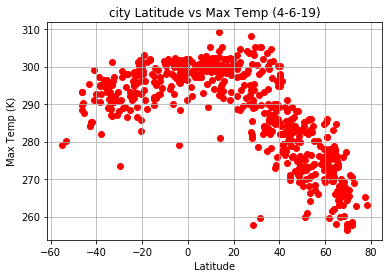

In [28]:
plt.title("city Latitude vs Max Temp (4-6-19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (K)")
plt.grid()

plt.scatter(weather_df["Latitude"],weather_df["Max Temp"], marker="o", color="red")
plt.show()

#### Latitude vs. Humidity Plot

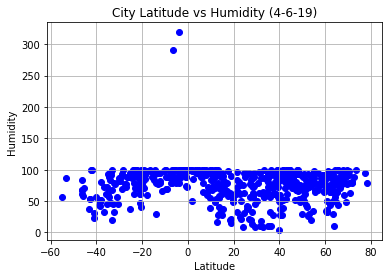

In [29]:
plt.title("City Latitude vs Humidity (4-6-19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()

plt.scatter(weather_df["Latitude"],weather_df["Humidity"], marker="o", color="blue")
plt.show()

#### Latitude vs. Cloudiness Plot

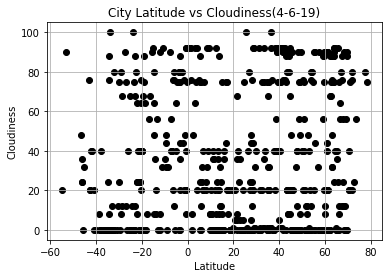

In [30]:
plt.title("City Latitude vs Cloudiness(4-6-19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()

plt.scatter(weather_df["Latitude"],weather_df["Cloudiness"], marker="o", color="black")
plt.show()

#### Latitude vs. Wind Speed Plot

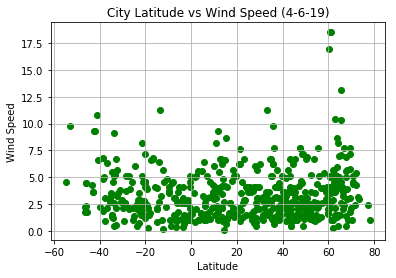

In [31]:
plt.title("City Latitude vs Wind Speed (4-6-19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()

plt.scatter(weather_df["Latitude"],weather_df["Wind Speed"], marker="o", color="green")
plt.show()

In [ ]:
#Observations

#1) Tempatures vary, default is using Kelvin.  City Latitude compared to Windspeed hasa few more outlier that have wind speed 9 and greater.
#2) City Latitude and Humidity has 2 outliers relative to the Kelvin values.  All others seem to be clumped between >50 and <100.
#3) City Latitude and Cloudiness, shows that the majority of the population cities are more cloudy above the equator.